시청률+코스닥 파일의 위치는 Baseline과 같은 곳에

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime
import time

# 행 많이보기
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 한글 폰트 설정
fm.get_fontconfig_fonts()

# fname 옵션을 사용하는 방법
font_location = 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('font', size=12)
plt.figure(figsize=(20,10))

# 지수 표현 안보기

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## 기본 데이터

In [2]:
# 데이터 로드
data = pd.read_excel('./Data/2019_data_time.xlsx', encoding='cp949', header=0, parse_dates=["방송일시"])

## 시청률 데이터

In [3]:
viewrate=pd.read_excel('./Data/시청률 데이터.xlsx',encoding='UTF-8',header=1)

## kosdaq(월별)

In [4]:
sipal=['18.01','18.02','18.03','18.04','18.05','18.06','18.07','18.08','18.09','18.10','18.11','18.12']
uniqName=['19.01','19.02','19.03','19.04','19.05','19.06','19.07','19.08','19.09','19.10','19.11','19.12','20.01','20.02','20.03','20.04','20.05','20.06','20.07']

In [5]:
kosdaq=pd.DataFrame()
for i in uniqName:
    d=pd.read_excel('./Data/'+i+'.xls',index_col='지수명')
    kosdaq=pd.concat([kosdaq,d.loc['코스닥지수',:]],axis=1)

In [6]:
#나중에 써먹어야지
지수명=d.index.tolist()
#지수명

In [7]:
kosdaq.columns=uniqName#sipal+uniqName

In [8]:
kosdaq=kosdaq.transpose()

In [9]:
# type을 숫자형태로 변환하기 위한 작업

거래량=kosdaq['거래량(주)'].tolist()
거래대금=kosdaq['거래대금(원)'].tolist()
for i in range(len(kosdaq)):
    거래량[i]=거래량[i].replace(',','')
    거래대금[i]=거래대금[i].replace(',','')
kosdaq['거래량(주)']=거래량
kosdaq['거래대금(원)']=거래대금

kosdaq=kosdaq.astype(float)

In [10]:
kosdaq['month']=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7]

In [11]:
kosdaq['year']=[19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20]

In [12]:
kosdaq

,시작일기준가,종료일종가,대비,등락률(%),거래량(주),거래대금(원),month,year
19.01,675.65,716.86,41.21,6.10,1.502063e+10,8.213548e+13,1,19
19.02,716.86,731.25,14.39,2.01,1.373109e+10,6.774083e+13,2,19
19.03,731.25,729.31,1.94,-0.27,1.557298e+10,8.930508e+13,3,19
19.04,729.31,754.74,25.43,3.49,1.855130e+10,9.350302e+13,4,19
19.05,754.74,696.47,58.27,-7.72,1.726539e+10,9.093319e+13,5,19
19.06,696.47,690.53,5.94,-0.85,1.625502e+10,8.168567e+13,6,19
19.07,690.53,630.18,60.35,-8.74,1.813212e+10,9.578695e+13,7,19
19.08,630.18,610.55,19.63,-3.11,1.601736e+10,8.386927e+13,8,19
19.09,610.55,621.76,11.21,1.84,1.523161e+10,7.556860e+13,9,19
19.10,621.76,658.52,36.76,5.91,1.865085e+10,1.120319e+14,10,19


# 전처리

In [13]:
# 무형 제거
data.drop(data[data['상품군']=='무형'].index, inplace=True)
data.reset_index(inplace=True)



# 판매단가, 취급액 쉼표 제거 , int 변환

# data['판매단가'] = data['판매단가'].str.replace(',','').astype(int)
# data['취급액'] = data['취급액'].str.replace(',','').astype(int)
# data['노출(분)'] = data['노출(분)'].astype(int)



# 취급액 결측치 값 변경
# df.loc[df['취급액']==1]['취급액'] = 50000


# 날짜 변경 ( 다음날 데이터를 현재 날짜로 할 건지 )
# data 의 colname 영어로 변경
# index drop 필요
print(data.columns)
data.columns = ['index', 'time', 'exposure_time', 'mcode', 'product_code', 'product_name', 'category','price','salesAMT']
print(data.columns)
                
# M', 'D', 'day', 'H', 'm',
#3
data['yy-mm-dd']=data['time'].apply(lambda time:str(time).split(' ')[0])
data['s-hh-mm']=data['time'].apply(lambda time:str(time).split(' ')[1])
data['s-hh-mm']=data['s-hh-mm'].apply(lambda x: x.split(':')[0]+":"+x.split(':')[1])
data['f-hh-mm']=data['s-hh-mm']

data['year']=data['time'].apply(lambda time:time.year)
data['month']=data['time'].apply(lambda time:time.month)
data['date']=data['time'].apply(lambda time: time.day)

data['hour']=data['time'].apply(lambda time:time.hour)
data['minute']=data['time'].apply(lambda time:time.minute)

data['dayofweek']=data['time'].apply(lambda time:time.dayofweek) # Monday=0, Sunday=6.

Index(['index', '방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액'], dtype='object')
Index(['index', 'time', 'exposure_time', 'mcode', 'product_code',
       'product_name', 'category', 'price', 'salesAMT'],
      dtype='object')


In [14]:
# 시청률이 해당 일 02:00~01:59(익일)으로 나와있음.
# 00:00~01:59의 시청율이 전날의 00:00~01:59 시청율 이므로
# 하나씩 아래로 밀어서 그 날의 00:00~01:59의 시청율을 구하고, 
# 2019-01-01 00:00~01:59의 경우, 2019-12-31의 시청율로 퉁 침.

viewrate.set_index(viewrate['시간대'], inplace=True)
viewrate.drop(['시간대'],axis=1,inplace=True)
viewrate = viewrate.transpose()

In [15]:
#print('row(행):',len(viewrate),'\ncolumn(열):',len(viewrate.iloc[0,:]))

nextday시청률=viewrate.loc[:,'00:00':]
nextdaycolumn=nextday시청률.columns
nextdayindex=nextday시청률.index
a=nextday시청률.loc['2019-12-31',:]
a=a.reset_index()
a.drop('시간대',axis=1,inplace=True)
a=a.transpose()
a.columns=nextdaycolumn


nextday시청률=nextday시청률.drop('2019-12-31',axis=0)
nextday시청률=nextday시청률.reset_index()
nextday시청률.drop(['index'],axis=1,inplace=True)


nextday시청률=pd.concat([a,nextday시청률],axis=0)
nextday시청률=nextday시청률.reset_index()
nextday시청률.drop('index',axis=1,inplace=True)
nextday시청률=nextday시청률.set_index(nextdayindex)

In [16]:
# 드롭을 하지 말고, 00:00~01:59 데이터의 경우 column명에 +24를 해서 보존하자
plus24=viewrate.loc[:,'00:00':].columns

notplus24=viewrate.loc[:,:'23:59'].columns #inex type
notplus24=list(notplus24) # list형태로 변환


plus24result=[]
for i in range(len(plus24)-1):
   
    hour=int(plus24[i].split(':')[0])+24
    minute=int(plus24[i].split(':')[1])
    string='{0:02d}'.format(hour)+':'+'{0:02d}'.format(minute)
    plus24result.append(string)
plus24result.append(plus24[-1])
newcolumn=notplus24+plus24result

In [17]:
viewrate.columns=newcolumn

In [18]:
viewrate=pd.concat([nextday시청률,viewrate],axis=1)
시청률unstack=viewrate.transpose().unstack()
#시청률unstack['2019-01-02']['01:59']
시청률unstack

2019-01-01                00:00                 0.024
                          00:01                 0.024
                          00:02                 0.024
                          00:03                 0.024
                          00:04                 0.024
                                                ...  
2019-01-01 to 2019-12-31  25:56                 0.004
                          25:57                 0.004
                          25:58                 0.004
                          25:59                 0.004
                          월화수목금토일02:00-01:59    0.004
Length: 571692, dtype: float64

In [19]:
# 끝난 시각 만들기
finishtime=[]
for i in range(len(data)):
    wdate=data.iloc[i,9]#년-월-일
    wstime=data.iloc[i,10]#s-hh-mm
    wduring=data.iloc[i,2]#exposure_time
    
    plushour,finishmin=divmod(int(wstime.split(':')[1])+int(wduring),60)#분끼리 더해서 60을 넘으면, 시간으로 반올림
    finishhour=int(wstime.split(':')[0])+int(plushour)
    #a,finishhour=divmod(finishhour,24)#24==0 바꾸는 작업
    
    finishtime.append('{0:02d}'.format(finishhour)+':'+'{0:02d}'.format(finishmin)) #2.6이상

data['f-hh-mm']=finishtime

#시청률unstack['2019-01-01']['02:00':'02:20'].sum()


In [20]:
시청률_sumlist=[]
for i in range(len(data)):
    wdate=data.iloc[i,9]#년-월-일
    wstime=data.iloc[i,10]#시작시각
    wftime=data.iloc[i,11]#끝시각
    print(wdate,wstime,wftime)
    if wdate=='2020-01-01':
        wdate='2019-12-31'
        wstime='24:00'
        wftime='24:20'
    else:
        None
    시청률_sumlist.append(시청률unstack[wdate][wstime:wftime].sum())

data['tvrate']=시청률_sumlist

2019-01-01 06:00 06:20
2019-01-01 06:00 06:20
2019-01-01 06:20 06:40
2019-01-01 06:20 06:40
2019-01-01 06:40 07:00
2019-01-01 06:40 07:00
2019-01-01 07:00 07:20
2019-01-01 07:20 07:40
2019-01-01 07:40 08:00
2019-01-01 08:00 08:20
2019-01-01 08:20 08:40
2019-01-01 08:40 09:00
2019-01-01 09:00 09:20
2019-01-01 09:20 09:40
2019-01-01 09:40 10:00
2019-01-01 10:00 10:20
2019-01-01 10:20 10:40
2019-01-01 10:40 11:00
2019-01-01 11:00 11:20
2019-01-01 11:20 11:40
2019-01-01 12:00 12:20
2019-01-01 12:20 12:40
2019-01-01 12:40 13:00
2019-01-01 13:00 13:30
2019-01-01 13:30 14:00
2019-01-01 14:00 14:30
2019-01-01 14:00 14:30
2019-01-01 14:30 15:00
2019-01-01 14:30 15:00
2019-01-01 15:00 15:20
2019-01-01 15:20 15:40
2019-01-01 15:40 16:00
2019-01-01 16:00 16:20
2019-01-01 16:20 16:40
2019-01-01 16:40 17:00
2019-01-01 17:00 17:20
2019-01-01 17:20 17:40
2019-01-01 17:40 18:00
2019-01-01 18:00 18:20
2019-01-01 18:20 18:40
2019-01-01 18:40 19:00
2019-01-01 19:00 19:20
2019-01-01 19:20 19:40
2019-01-01 

2019-01-05 19:20 19:40
2019-01-05 19:40 20:00
2019-01-05 19:40 20:00
2019-01-05 19:40 20:00
2019-01-05 19:40 20:00
2019-01-05 20:00 20:20
2019-01-05 20:00 20:20
2019-01-05 20:00 20:20
2019-01-05 20:20 20:40
2019-01-05 20:20 20:40
2019-01-05 20:20 20:40
2019-01-05 20:40 21:00
2019-01-05 20:40 21:00
2019-01-05 20:40 21:00
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:20 21:40
2019-01-05 21:20 21:40
2019-01-05 21:20 21:40
2019-01-05 21:20 21:40
2019-01-05 21:20 21:40
2019-01-05 21:20 21:40
2019-01-05 21:40 22:00
2019-01-05 21:40 22:00
2019-01-05 21:40 22:00
2019-01-05 21:40 22:00
2019-01-05 21:40 22:00
2019-01-05 21:40 22:00
2019-01-05 22:00 22:20
2019-01-05 22:20 22:40
2019-01-05 22:40 23:00
2019-01-05 23:00 23:20
2019-01-05 23:00 23:20
2019-01-05 23:20 23:40
2019-01-05 23:20 23:40
2019-01-05 23:40 24:00
2019-01-05 23:40 24:00
2019-01-06 00:00 00:20
2019-01-06 00:20 00:40
2019-01-06 

2019-01-09 16:20 16:40
2019-01-09 16:40 17:00
2019-01-09 17:00 17:20
2019-01-09 17:20 17:40
2019-01-09 17:40 18:00
2019-01-09 18:00 18:20
2019-01-09 18:20 18:40
2019-01-09 18:40 19:00
2019-01-09 19:00 19:20
2019-01-09 19:00 19:20
2019-01-09 19:20 19:40
2019-01-09 19:20 19:40
2019-01-09 19:40 20:00
2019-01-09 19:40 20:00
2019-01-09 20:00 20:20
2019-01-09 20:20 20:40
2019-01-09 20:40 21:00
2019-01-09 21:00 21:20
2019-01-09 21:20 21:40
2019-01-09 21:40 22:00
2019-01-09 22:00 22:30
2019-01-09 22:30 23:00
2019-01-09 23:00 23:20
2019-01-09 23:20 23:40
2019-01-09 23:40 24:00
2019-01-10 00:00 00:20
2019-01-10 00:20 00:40
2019-01-10 00:40 01:00
2019-01-10 01:00 01:20
2019-01-10 01:20 01:40
2019-01-10 01:40 01:57
2019-01-10 06:00 06:20
2019-01-10 06:00 06:20
2019-01-10 06:20 06:40
2019-01-10 06:20 06:40
2019-01-10 06:40 07:00
2019-01-10 06:40 07:00
2019-01-10 07:00 07:20
2019-01-10 07:20 07:40
2019-01-10 07:40 08:00
2019-01-10 08:00 08:20
2019-01-10 08:20 08:40
2019-01-10 08:40 09:00
2019-01-10 

2019-01-13 14:30 15:00
2019-01-13 15:00 15:30
2019-01-13 15:30 16:00
2019-01-13 16:00 16:20
2019-01-13 16:20 16:40
2019-01-13 16:40 17:00
2019-01-13 17:00 17:20
2019-01-13 17:20 17:40
2019-01-13 17:40 18:00
2019-01-13 18:00 18:20
2019-01-13 18:00 18:20
2019-01-13 18:00 18:20
2019-01-13 18:00 18:20
2019-01-13 18:20 18:40
2019-01-13 18:20 18:40
2019-01-13 18:20 18:40
2019-01-13 18:20 18:40
2019-01-13 18:40 19:00
2019-01-13 18:40 19:00
2019-01-13 18:40 19:00
2019-01-13 18:40 19:00
2019-01-13 19:00 19:20
2019-01-13 19:00 19:20
2019-01-13 19:20 19:40
2019-01-13 19:20 19:40
2019-01-13 19:40 20:00
2019-01-13 19:40 20:00
2019-01-13 20:00 20:20
2019-01-13 20:00 20:20
2019-01-13 20:00 20:20
2019-01-13 20:20 20:40
2019-01-13 20:20 20:40
2019-01-13 20:20 20:40
2019-01-13 20:40 21:00
2019-01-13 20:40 21:00
2019-01-13 20:40 21:00
2019-01-13 21:00 21:30
2019-01-13 21:30 22:00
2019-01-13 22:00 22:20
2019-01-13 22:20 22:40
2019-01-13 22:40 23:00
2019-01-13 23:00 23:30
2019-01-13 23:30 24:00
2019-01-14 

2019-01-17 12:00 12:20
2019-01-17 12:20 12:40
2019-01-17 12:40 13:00
2019-01-17 13:00 13:20
2019-01-17 13:00 13:20
2019-01-17 13:20 13:40
2019-01-17 13:20 13:40
2019-01-17 13:40 14:00
2019-01-17 13:40 14:00
2019-01-17 14:00 14:30
2019-01-17 14:30 15:00
2019-01-17 15:00 15:20
2019-01-17 15:20 15:40
2019-01-17 15:40 16:00
2019-01-17 16:00 16:20
2019-01-17 16:20 16:40
2019-01-17 16:40 17:00
2019-01-17 17:00 17:30
2019-01-17 17:30 18:00
2019-01-17 18:00 18:20
2019-01-17 18:20 18:40
2019-01-17 18:40 19:00
2019-01-17 19:00 19:20
2019-01-17 19:00 19:20
2019-01-17 19:20 19:40
2019-01-17 19:20 19:40
2019-01-17 19:40 20:00
2019-01-17 19:40 20:00
2019-01-17 20:00 20:20
2019-01-17 20:20 20:40
2019-01-17 20:40 21:00
2019-01-17 21:00 21:20
2019-01-17 21:00 21:20
2019-01-17 21:00 21:20
2019-01-17 21:00 21:20
2019-01-17 21:00 21:20
2019-01-17 21:00 21:20
2019-01-17 21:20 21:40
2019-01-17 21:20 21:40
2019-01-17 21:20 21:40
2019-01-17 21:20 21:40
2019-01-17 21:20 21:40
2019-01-17 21:20 21:40
2019-01-17 

2019-01-21 01:40 01:56
2019-01-21 06:00 06:20
2019-01-21 06:20 06:40
2019-01-21 06:40 07:00
2019-01-21 07:00 07:20
2019-01-21 07:20 07:40
2019-01-21 07:40 08:00
2019-01-21 08:00 08:20
2019-01-21 08:20 08:40
2019-01-21 08:40 09:00
2019-01-21 09:00 09:20
2019-01-21 09:20 09:40
2019-01-21 09:40 10:00
2019-01-21 10:00 10:30
2019-01-21 10:30 11:00
2019-01-21 11:00 11:20
2019-01-21 11:20 11:40
2019-01-21 11:40 12:00
2019-01-21 12:00 12:20
2019-01-21 12:20 12:40
2019-01-21 12:40 13:00
2019-01-21 13:00 13:20
2019-01-21 13:20 13:40
2019-01-21 13:40 14:00
2019-01-21 14:00 14:20
2019-01-21 14:20 14:40
2019-01-21 14:40 15:00
2019-01-21 15:00 15:20
2019-01-21 15:20 15:40
2019-01-21 15:40 16:00
2019-01-21 16:00 16:20
2019-01-21 16:20 16:40
2019-01-21 16:40 17:00
2019-01-21 17:00 17:20
2019-01-21 17:20 17:40
2019-01-21 17:40 18:00
2019-01-21 18:00 18:20
2019-01-21 18:20 18:40
2019-01-21 18:40 19:00
2019-01-21 19:00 19:20
2019-01-21 19:00 19:20
2019-01-21 19:20 19:40
2019-01-21 19:20 19:40
2019-01-21 

2019-01-24 21:40 22:00
2019-01-24 22:00 22:20
2019-01-24 22:20 22:40
2019-01-24 22:40 23:00
2019-01-24 23:00 23:20
2019-01-24 23:00 23:20
2019-01-24 23:20 23:40
2019-01-24 23:20 23:40
2019-01-24 23:40 24:00
2019-01-24 23:40 24:00
2019-01-25 00:00 00:20
2019-01-25 00:20 00:40
2019-01-25 00:40 01:00
2019-01-25 01:00 01:20
2019-01-25 01:00 01:20
2019-01-25 01:20 01:40
2019-01-25 01:20 01:40
2019-01-25 01:40 01:56
2019-01-25 01:40 01:56
2019-01-25 06:00 06:20
2019-01-25 06:00 06:20
2019-01-25 06:20 06:40
2019-01-25 06:20 06:40
2019-01-25 06:40 07:00
2019-01-25 06:40 07:00
2019-01-25 07:00 07:20
2019-01-25 07:20 07:40
2019-01-25 07:40 08:00
2019-01-25 08:00 08:30
2019-01-25 08:00 08:30
2019-01-25 08:30 09:00
2019-01-25 08:30 09:00
2019-01-25 09:00 09:20
2019-01-25 09:20 09:40
2019-01-25 09:40 10:00
2019-01-25 10:00 10:20
2019-01-25 10:20 10:40
2019-01-25 10:40 11:00
2019-01-25 11:00 11:30
2019-01-25 11:30 12:00
2019-01-25 12:00 12:20
2019-01-25 12:00 12:20
2019-01-25 12:20 12:40
2019-01-25 

2019-01-29 10:40 11:00
2019-01-29 11:00 11:20
2019-01-29 11:20 11:40
2019-01-29 11:40 12:00
2019-01-29 12:00 12:20
2019-01-29 12:20 12:40
2019-01-29 12:40 13:00
2019-01-29 13:00 13:20
2019-01-29 13:20 13:40
2019-01-29 13:40 14:00
2019-01-29 14:00 14:20
2019-01-29 14:20 14:40
2019-01-29 14:40 15:00
2019-01-29 15:00 15:20
2019-01-29 15:20 15:40
2019-01-29 15:40 16:00
2019-01-29 16:00 16:20
2019-01-29 16:20 16:40
2019-01-29 16:40 17:00
2019-01-29 17:00 17:20
2019-01-29 17:20 17:40
2019-01-29 17:40 18:00
2019-01-29 18:00 18:20
2019-01-29 18:20 18:40
2019-01-29 18:40 19:00
2019-01-29 19:00 19:20
2019-01-29 19:20 19:40
2019-01-29 19:40 20:00
2019-01-29 20:00 20:20
2019-01-29 20:20 20:40
2019-01-29 20:40 21:00
2019-01-29 21:00 21:20
2019-01-29 21:20 21:40
2019-01-29 21:40 22:00
2019-01-29 22:00 22:20
2019-01-29 22:00 22:20
2019-01-29 22:00 22:20
2019-01-29 22:00 22:20
2019-01-29 22:20 22:40
2019-01-29 22:20 22:40
2019-01-29 22:20 22:40
2019-01-29 22:20 22:40
2019-01-29 22:40 23:00
2019-01-29 

2019-02-02 11:00 11:20
2019-02-02 11:20 11:40
2019-02-02 11:20 11:40
2019-02-02 11:40 12:00
2019-02-02 11:40 12:00
2019-02-02 12:00 12:20
2019-02-02 12:20 12:40
2019-02-02 12:40 13:00
2019-02-02 13:00 13:20
2019-02-02 13:20 13:40
2019-02-02 13:40 14:00
2019-02-02 14:00 14:20
2019-02-02 14:20 14:40
2019-02-02 14:40 15:00
2019-02-02 15:00 15:20
2019-02-02 15:20 15:40
2019-02-02 15:40 16:00
2019-02-02 16:00 16:20
2019-02-02 16:20 16:40
2019-02-02 16:40 17:00
2019-02-02 17:00 17:30
2019-02-02 17:30 18:00
2019-02-02 18:20 18:40
2019-02-02 18:40 19:00
2019-02-02 19:00 19:20
2019-02-02 19:00 19:20
2019-02-02 19:00 19:20
2019-02-02 19:20 19:40
2019-02-02 19:20 19:40
2019-02-02 19:20 19:40
2019-02-02 19:40 20:00
2019-02-02 19:40 20:00
2019-02-02 19:40 20:00
2019-02-02 20:00 20:20
2019-02-02 20:20 20:40
2019-02-02 20:40 21:00
2019-02-02 21:00 21:20
2019-02-02 21:00 21:20
2019-02-02 21:00 21:20
2019-02-02 21:00 21:20
2019-02-02 21:20 21:40
2019-02-02 21:20 21:40
2019-02-02 21:20 21:40
2019-02-02 

2019-02-05 23:40 24:00
2019-02-06 00:00 00:20
2019-02-06 00:00 00:20
2019-02-06 00:20 00:40
2019-02-06 00:20 00:40
2019-02-06 00:40 01:00
2019-02-06 00:40 01:00
2019-02-06 01:00 01:20
2019-02-06 01:20 01:40
2019-02-06 01:40 01:56
2019-02-06 06:00 06:20
2019-02-06 06:20 06:40
2019-02-06 06:40 07:00
2019-02-06 07:00 07:20
2019-02-06 07:20 07:40
2019-02-06 07:40 08:00
2019-02-06 08:00 08:20
2019-02-06 08:00 08:20
2019-02-06 08:20 08:40
2019-02-06 08:20 08:40
2019-02-06 08:40 09:00
2019-02-06 08:40 09:00
2019-02-06 09:00 09:20
2019-02-06 09:20 09:40
2019-02-06 09:40 10:00
2019-02-06 10:00 10:20
2019-02-06 10:20 10:40
2019-02-06 10:40 11:00
2019-02-06 11:00 11:20
2019-02-06 11:20 11:40
2019-02-06 11:40 12:00
2019-02-06 12:00 12:20
2019-02-06 12:20 12:40
2019-02-06 12:40 13:00
2019-02-06 13:00 13:20
2019-02-06 13:00 13:20
2019-02-06 13:20 13:40
2019-02-06 13:20 13:40
2019-02-06 13:40 14:00
2019-02-06 13:40 14:00
2019-02-06 14:00 14:20
2019-02-06 14:20 14:40
2019-02-06 14:40 15:00
2019-02-06 

2019-02-09 15:40 16:00
2019-02-09 15:40 16:00
2019-02-09 16:00 16:20
2019-02-09 16:20 16:40
2019-02-09 16:40 17:00
2019-02-09 17:00 17:20
2019-02-09 17:20 17:40
2019-02-09 17:40 18:00
2019-02-09 18:20 18:40
2019-02-09 18:40 19:00
2019-02-09 19:00 19:20
2019-02-09 19:20 19:40
2019-02-09 19:40 20:00
2019-02-09 20:00 20:20
2019-02-09 20:00 20:20
2019-02-09 20:20 20:40
2019-02-09 20:20 20:40
2019-02-09 20:40 21:00
2019-02-09 20:40 21:00
2019-02-09 21:00 21:20
2019-02-09 21:00 21:20
2019-02-09 21:00 21:20
2019-02-09 21:00 21:20
2019-02-09 21:20 21:40
2019-02-09 21:20 21:40
2019-02-09 21:20 21:40
2019-02-09 21:20 21:40
2019-02-09 21:40 22:00
2019-02-09 21:40 22:00
2019-02-09 21:40 22:00
2019-02-09 21:40 22:00
2019-02-09 22:00 22:20
2019-02-09 22:00 22:20
2019-02-09 22:00 22:20
2019-02-09 22:00 22:20
2019-02-09 22:00 22:20
2019-02-09 22:00 22:20
2019-02-09 22:20 22:40
2019-02-09 22:20 22:40
2019-02-09 22:20 22:40
2019-02-09 22:20 22:40
2019-02-09 22:20 22:40
2019-02-09 22:20 22:40
2019-02-09 

2019-02-13 19:40 20:00
2019-02-13 20:00 20:20
2019-02-13 20:20 20:40
2019-02-13 20:40 21:00
2019-02-13 21:00 21:20
2019-02-13 21:00 21:20
2019-02-13 21:20 21:40
2019-02-13 21:20 21:40
2019-02-13 21:40 22:00
2019-02-13 21:40 22:00
2019-02-13 22:00 22:20
2019-02-13 22:20 22:40
2019-02-13 22:40 23:00
2019-02-13 23:00 23:20
2019-02-13 23:20 23:40
2019-02-13 23:40 24:00
2019-02-14 00:00 00:20
2019-02-14 00:00 00:20
2019-02-14 00:00 00:20
2019-02-14 00:20 00:40
2019-02-14 00:20 00:40
2019-02-14 00:20 00:40
2019-02-14 00:40 01:00
2019-02-14 00:40 01:00
2019-02-14 00:40 01:00
2019-02-14 01:00 01:20
2019-02-14 01:20 01:40
2019-02-14 01:40 01:56
2019-02-14 06:00 06:20
2019-02-14 06:20 06:40
2019-02-14 06:40 07:00
2019-02-14 07:00 07:20
2019-02-14 07:20 07:40
2019-02-14 07:40 08:00
2019-02-14 08:00 08:20
2019-02-14 08:20 08:40
2019-02-14 08:40 09:00
2019-02-14 09:00 09:20
2019-02-14 09:20 09:40
2019-02-14 09:40 10:00
2019-02-14 10:00 10:20
2019-02-14 10:00 10:20
2019-02-14 10:00 10:20
2019-02-14 

2019-02-17 11:00 11:20
2019-02-17 11:20 11:40
2019-02-17 11:40 12:00
2019-02-17 12:00 12:20
2019-02-17 12:20 12:40
2019-02-17 12:40 13:00
2019-02-17 13:00 13:20
2019-02-17 13:00 13:20
2019-02-17 13:00 13:20
2019-02-17 13:00 13:20
2019-02-17 13:20 13:40
2019-02-17 13:20 13:40
2019-02-17 13:20 13:40
2019-02-17 13:20 13:40
2019-02-17 13:40 14:00
2019-02-17 13:40 14:00
2019-02-17 13:40 14:00
2019-02-17 13:40 14:00
2019-02-17 14:00 14:20
2019-02-17 14:20 14:40
2019-02-17 14:40 15:00
2019-02-17 15:00 15:20
2019-02-17 15:00 15:20
2019-02-17 15:20 15:40
2019-02-17 15:20 15:40
2019-02-17 15:40 16:00
2019-02-17 15:40 16:00
2019-02-17 16:00 16:20
2019-02-17 16:20 16:40
2019-02-17 16:40 17:00
2019-02-17 17:00 17:20
2019-02-17 17:20 17:40
2019-02-17 17:40 18:00
2019-02-17 18:00 18:20
2019-02-17 18:20 18:40
2019-02-17 18:40 19:00
2019-02-17 19:00 19:20
2019-02-17 19:00 19:20
2019-02-17 19:20 19:40
2019-02-17 19:20 19:40
2019-02-17 19:40 20:00
2019-02-17 19:40 20:00
2019-02-17 20:00 20:20
2019-02-17 

2019-02-20 21:20 21:40
2019-02-20 21:20 21:40
2019-02-20 21:20 21:40
2019-02-20 21:40 22:00
2019-02-20 21:40 22:00
2019-02-20 21:40 22:00
2019-02-20 21:40 22:00
2019-02-20 21:40 22:00
2019-02-20 21:40 22:00
2019-02-20 22:00 22:20
2019-02-20 22:00 22:20
2019-02-20 22:00 22:20
2019-02-20 22:00 22:20
2019-02-20 22:00 22:20
2019-02-20 22:00 22:20
2019-02-20 22:20 22:40
2019-02-20 22:20 22:40
2019-02-20 22:20 22:40
2019-02-20 22:20 22:40
2019-02-20 22:20 22:40
2019-02-20 22:20 22:40
2019-02-20 22:40 23:00
2019-02-20 22:40 23:00
2019-02-20 22:40 23:00
2019-02-20 22:40 23:00
2019-02-20 22:40 23:00
2019-02-20 22:40 23:00
2019-02-20 23:00 23:20
2019-02-20 23:20 23:40
2019-02-20 23:40 24:00
2019-02-21 00:00 00:20
2019-02-21 00:20 00:40
2019-02-21 00:40 01:00
2019-02-21 01:00 01:20
2019-02-21 01:00 01:20
2019-02-21 01:20 01:40
2019-02-21 01:20 01:40
2019-02-21 01:40 01:56
2019-02-21 01:40 01:56
2019-02-21 06:00 06:20
2019-02-21 06:20 06:40
2019-02-21 06:40 07:00
2019-02-21 07:00 07:20
2019-02-21 

2019-02-24 19:20 19:40
2019-02-24 19:20 19:40
2019-02-24 19:20 19:40
2019-02-24 19:40 20:00
2019-02-24 19:40 20:00
2019-02-24 19:40 20:00
2019-02-24 19:40 20:00
2019-02-24 20:00 20:20
2019-02-24 20:00 20:20
2019-02-24 20:00 20:20
2019-02-24 20:20 20:40
2019-02-24 20:20 20:40
2019-02-24 20:20 20:40
2019-02-24 20:40 21:00
2019-02-24 20:40 21:00
2019-02-24 20:40 21:00
2019-02-24 21:00 21:20
2019-02-24 21:20 21:40
2019-02-24 21:40 22:00
2019-02-24 22:00 22:20
2019-02-24 22:00 22:20
2019-02-24 22:00 22:20
2019-02-24 22:00 22:20
2019-02-24 22:20 22:40
2019-02-24 22:20 22:40
2019-02-24 22:20 22:40
2019-02-24 22:20 22:40
2019-02-24 22:40 23:00
2019-02-24 22:40 23:00
2019-02-24 22:40 23:00
2019-02-24 22:40 23:00
2019-02-24 23:00 23:20
2019-02-24 23:00 23:20
2019-02-24 23:00 23:20
2019-02-24 23:00 23:20
2019-02-24 23:00 23:20
2019-02-24 23:00 23:20
2019-02-24 23:20 23:40
2019-02-24 23:20 23:40
2019-02-24 23:20 23:40
2019-02-24 23:20 23:40
2019-02-24 23:20 23:40
2019-02-24 23:20 23:40
2019-02-24 

2019-03-01 01:20 01:40
2019-03-01 01:40 01:56
2019-03-01 06:00 06:20
2019-03-01 06:20 06:40
2019-03-01 06:40 07:00
2019-03-01 07:00 07:20
2019-03-01 07:20 07:40
2019-03-01 07:40 08:00
2019-03-01 08:00 08:20
2019-03-01 08:20 08:40
2019-03-01 08:40 09:00
2019-03-01 09:00 09:20
2019-03-01 09:20 09:40
2019-03-01 09:40 10:00
2019-03-01 10:00 10:20
2019-03-01 10:20 10:40
2019-03-01 10:40 11:00
2019-03-01 11:00 11:20
2019-03-01 11:00 11:20
2019-03-01 11:00 11:20
2019-03-01 11:00 11:20
2019-03-01 11:20 11:40
2019-03-01 11:20 11:40
2019-03-01 11:20 11:40
2019-03-01 11:20 11:40
2019-03-01 11:40 12:00
2019-03-01 11:40 12:00
2019-03-01 11:40 12:00
2019-03-01 11:40 12:00
2019-03-01 12:00 12:20
2019-03-01 12:20 12:40
2019-03-01 12:40 13:00
2019-03-01 13:00 13:20
2019-03-01 13:20 13:40
2019-03-01 13:40 14:00
2019-03-01 14:00 14:20
2019-03-01 14:20 14:40
2019-03-01 14:40 15:00
2019-03-01 15:00 15:20
2019-03-01 15:00 15:20
2019-03-01 15:00 15:20
2019-03-01 15:00 15:20
2019-03-01 15:20 15:40
2019-03-01 

2019-03-04 09:40 10:00
2019-03-04 10:00 10:20
2019-03-04 10:20 10:40
2019-03-04 10:40 11:00
2019-03-04 11:00 11:20
2019-03-04 11:20 11:40
2019-03-04 11:40 12:00
2019-03-04 12:00 12:20
2019-03-04 12:20 12:40
2019-03-04 12:40 13:00
2019-03-04 13:00 13:20
2019-03-04 13:20 13:40
2019-03-04 13:40 14:00
2019-03-04 14:00 14:20
2019-03-04 14:20 14:40
2019-03-04 14:40 15:00
2019-03-04 15:00 15:30
2019-03-04 15:30 16:00
2019-03-04 16:00 16:20
2019-03-04 16:20 16:40
2019-03-04 16:40 17:00
2019-03-04 17:00 17:20
2019-03-04 17:20 17:40
2019-03-04 17:40 18:00
2019-03-04 18:00 18:30
2019-03-04 18:00 18:30
2019-03-04 18:30 19:00
2019-03-04 18:30 19:00
2019-03-04 19:00 19:20
2019-03-04 19:00 19:20
2019-03-04 19:20 19:40
2019-03-04 19:20 19:40
2019-03-04 19:40 20:00
2019-03-04 19:40 20:00
2019-03-04 20:00 20:20
2019-03-04 20:00 20:20
2019-03-04 20:00 20:20
2019-03-04 20:00 20:20
2019-03-04 20:00 20:20
2019-03-04 20:00 20:20
2019-03-04 20:20 20:40
2019-03-04 20:20 20:40
2019-03-04 20:20 20:40
2019-03-04 

2019-03-07 21:40 22:00
2019-03-07 21:40 22:00
2019-03-07 21:40 22:00
2019-03-07 22:00 22:20
2019-03-07 22:00 22:20
2019-03-07 22:20 22:40
2019-03-07 22:20 22:40
2019-03-07 22:40 23:00
2019-03-07 22:40 23:00
2019-03-07 23:00 23:20
2019-03-07 23:20 23:40
2019-03-07 23:40 24:00
2019-03-08 00:00 00:30
2019-03-08 00:00 00:30
2019-03-08 00:30 01:00
2019-03-08 00:30 01:00
2019-03-08 01:00 01:20
2019-03-08 01:20 01:40
2019-03-08 01:40 01:56
2019-03-08 06:00 06:20
2019-03-08 06:20 06:40
2019-03-08 06:40 07:00
2019-03-08 07:00 07:20
2019-03-08 07:20 07:40
2019-03-08 07:40 08:00
2019-03-08 08:00 08:30
2019-03-08 08:00 08:30
2019-03-08 08:30 09:00
2019-03-08 08:30 09:00
2019-03-08 09:00 09:20
2019-03-08 09:20 09:40
2019-03-08 09:40 10:00
2019-03-08 10:00 10:20
2019-03-08 10:20 10:40
2019-03-08 10:40 11:00
2019-03-08 11:00 11:20
2019-03-08 11:00 11:20
2019-03-08 11:20 11:40
2019-03-08 11:20 11:40
2019-03-08 11:40 12:00
2019-03-08 11:40 12:00
2019-03-08 12:00 12:20
2019-03-08 12:00 12:20
2019-03-08 

2019-03-11 12:40 13:00
2019-03-11 12:40 13:00
2019-03-11 13:00 13:30
2019-03-11 13:00 13:30
2019-03-11 13:30 14:00
2019-03-11 13:30 14:00
2019-03-11 14:00 14:20
2019-03-11 14:20 14:40
2019-03-11 14:40 15:00
2019-03-11 15:00 15:20
2019-03-11 15:20 15:40
2019-03-11 15:40 16:00
2019-03-11 16:00 16:20
2019-03-11 16:20 16:40
2019-03-11 16:40 17:00
2019-03-11 17:00 17:20
2019-03-11 17:20 17:40
2019-03-11 17:40 18:00
2019-03-11 18:00 18:20
2019-03-11 18:20 18:40
2019-03-11 18:40 19:00
2019-03-11 19:00 19:20
2019-03-11 19:00 19:20
2019-03-11 19:00 19:20
2019-03-11 19:20 19:40
2019-03-11 19:20 19:40
2019-03-11 19:20 19:40
2019-03-11 19:40 20:00
2019-03-11 19:40 20:00
2019-03-11 19:40 20:00
2019-03-11 20:00 20:20
2019-03-11 20:20 20:40
2019-03-11 20:40 21:00
2019-03-11 21:00 21:20
2019-03-11 21:00 21:20
2019-03-11 21:20 21:40
2019-03-11 21:20 21:40
2019-03-11 21:40 22:00
2019-03-11 21:40 22:00
2019-03-11 22:00 22:20
2019-03-11 22:20 22:40
2019-03-11 22:40 23:00
2019-03-11 23:00 23:20
2019-03-11 

2019-03-15 09:20 09:40
2019-03-15 09:40 10:00
2019-03-15 10:00 10:20
2019-03-15 10:20 10:40
2019-03-15 10:40 11:00
2019-03-15 11:00 11:20
2019-03-15 11:00 11:20
2019-03-15 11:20 11:40
2019-03-15 11:20 11:40
2019-03-15 11:40 12:00
2019-03-15 11:40 12:00
2019-03-15 12:00 12:20
2019-03-15 12:20 12:40
2019-03-15 12:40 13:00
2019-03-15 13:00 13:20
2019-03-15 13:00 13:20
2019-03-15 13:20 13:40
2019-03-15 13:20 13:40
2019-03-15 13:40 14:00
2019-03-15 13:40 14:00
2019-03-15 14:00 14:20
2019-03-15 14:00 14:20
2019-03-15 14:20 14:40
2019-03-15 14:20 14:40
2019-03-15 14:40 15:00
2019-03-15 14:40 15:00
2019-03-15 15:00 15:20
2019-03-15 15:20 15:40
2019-03-15 15:40 16:00
2019-03-15 16:00 16:20
2019-03-15 16:20 16:40
2019-03-15 16:40 17:00
2019-03-15 17:00 17:20
2019-03-15 17:20 17:40
2019-03-15 17:40 18:00
2019-03-15 18:00 18:20
2019-03-15 18:20 18:40
2019-03-15 18:40 19:00
2019-03-15 19:00 19:20
2019-03-15 19:20 19:40
2019-03-15 19:40 20:00
2019-03-15 20:00 20:20
2019-03-15 20:00 20:20
2019-03-15 

2019-03-19 07:40 08:00
2019-03-19 07:40 08:00
2019-03-19 08:00 08:30
2019-03-19 08:00 08:30
2019-03-19 08:30 09:00
2019-03-19 08:30 09:00
2019-03-19 09:00 09:20
2019-03-19 09:20 09:40
2019-03-19 09:40 10:00
2019-03-19 10:00 10:20
2019-03-19 10:20 10:40
2019-03-19 10:40 11:00
2019-03-19 11:00 11:20
2019-03-19 11:00 11:20
2019-03-19 11:00 11:20
2019-03-19 11:20 11:40
2019-03-19 11:20 11:40
2019-03-19 11:20 11:40
2019-03-19 11:40 12:00
2019-03-19 11:40 12:00
2019-03-19 11:40 12:00
2019-03-19 12:00 12:20
2019-03-19 12:00 12:20
2019-03-19 12:20 12:40
2019-03-19 12:20 12:40
2019-03-19 12:40 13:00
2019-03-19 12:40 13:00
2019-03-19 13:00 13:20
2019-03-19 13:20 13:40
2019-03-19 13:40 14:00
2019-03-19 14:00 14:20
2019-03-19 14:20 14:40
2019-03-19 14:40 15:00
2019-03-19 15:00 15:20
2019-03-19 15:20 15:40
2019-03-19 15:40 16:00
2019-03-19 16:00 16:20
2019-03-19 16:20 16:40
2019-03-19 16:40 17:00
2019-03-19 17:00 17:20
2019-03-19 17:20 17:40
2019-03-19 17:40 18:00
2019-03-19 18:00 18:20
2019-03-19 

2019-03-23 07:20 07:40
2019-03-23 07:20 07:40
2019-03-23 07:40 08:00
2019-03-23 07:40 08:00
2019-03-23 08:00 08:20
2019-03-23 08:00 08:20
2019-03-23 08:20 08:40
2019-03-23 08:20 08:40
2019-03-23 08:40 09:00
2019-03-23 08:40 09:00
2019-03-23 09:00 09:20
2019-03-23 09:00 09:20
2019-03-23 09:00 09:20
2019-03-23 09:00 09:20
2019-03-23 09:00 09:20
2019-03-23 09:00 09:20
2019-03-23 09:20 09:40
2019-03-23 09:20 09:40
2019-03-23 09:20 09:40
2019-03-23 09:20 09:40
2019-03-23 09:20 09:40
2019-03-23 09:20 09:40
2019-03-23 09:40 10:00
2019-03-23 09:40 10:00
2019-03-23 09:40 10:00
2019-03-23 09:40 10:00
2019-03-23 09:40 10:00
2019-03-23 09:40 10:00
2019-03-23 10:00 10:20
2019-03-23 10:20 10:40
2019-03-23 10:40 11:00
2019-03-23 11:00 11:30
2019-03-23 11:00 11:30
2019-03-23 11:30 12:00
2019-03-23 11:30 12:00
2019-03-23 12:00 12:20
2019-03-23 12:00 12:20
2019-03-23 12:00 12:20
2019-03-23 12:00 12:20
2019-03-23 12:20 12:40
2019-03-23 12:20 12:40
2019-03-23 12:20 12:40
2019-03-23 12:20 12:40
2019-03-23 

2019-03-27 06:00 06:20
2019-03-27 06:20 06:40
2019-03-27 06:20 06:40
2019-03-27 06:40 07:00
2019-03-27 06:40 07:00
2019-03-27 07:00 07:20
2019-03-27 07:20 07:40
2019-03-27 07:40 08:00
2019-03-27 08:00 08:20
2019-03-27 08:20 08:40
2019-03-27 08:40 09:00
2019-03-27 09:00 09:30
2019-03-27 09:30 10:00
2019-03-27 10:00 10:20
2019-03-27 10:00 10:20
2019-03-27 10:00 10:20
2019-03-27 10:00 10:20
2019-03-27 10:20 10:40
2019-03-27 10:20 10:40
2019-03-27 10:20 10:40
2019-03-27 10:20 10:40
2019-03-27 10:40 11:00
2019-03-27 10:40 11:00
2019-03-27 10:40 11:00
2019-03-27 10:40 11:00
2019-03-27 11:00 11:20
2019-03-27 11:00 11:20
2019-03-27 11:20 11:40
2019-03-27 11:20 11:40
2019-03-27 11:40 12:00
2019-03-27 11:40 12:00
2019-03-27 12:00 12:30
2019-03-27 12:00 12:30
2019-03-27 12:30 13:00
2019-03-27 12:30 13:00
2019-03-27 13:00 13:20
2019-03-27 13:20 13:40
2019-03-27 13:40 14:00
2019-03-27 14:00 14:20
2019-03-27 14:20 14:40
2019-03-27 14:40 15:00
2019-03-27 15:00 15:20
2019-03-27 15:00 15:20
2019-03-27 

2019-03-30 20:00 20:20
2019-03-30 20:00 20:20
2019-03-30 20:00 20:20
2019-03-30 20:20 20:40
2019-03-30 20:20 20:40
2019-03-30 20:40 21:00
2019-03-30 20:40 21:00
2019-03-30 21:00 21:20
2019-03-30 21:00 21:20
2019-03-30 21:20 21:40
2019-03-30 21:20 21:40
2019-03-30 21:20 21:40
2019-03-30 21:40 22:00
2019-03-30 21:40 22:00
2019-03-30 21:40 22:00
2019-03-30 22:00 22:20
2019-03-30 22:00 22:20
2019-03-30 22:00 22:20
2019-03-30 22:20 22:40
2019-03-30 22:20 22:40
2019-03-30 22:40 23:00
2019-03-30 22:40 23:00
2019-03-30 23:00 23:20
2019-03-30 23:00 23:20
2019-03-30 23:20 23:40
2019-03-30 23:20 23:40
2019-03-30 23:20 23:40
2019-03-30 23:20 23:40
2019-03-30 23:20 23:40
2019-03-30 23:20 23:40
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 01:20 01:40
2019-03-31 

2019-04-02 17:20 17:40
2019-04-02 17:40 18:00
2019-04-02 18:00 18:20
2019-04-02 18:20 18:40
2019-04-02 18:40 19:00
2019-04-02 19:00 19:20
2019-04-02 19:20 19:40
2019-04-02 19:40 20:00
2019-04-02 20:00 20:20
2019-04-02 20:00 20:20
2019-04-02 20:20 20:40
2019-04-02 20:20 20:40
2019-04-02 20:40 21:00
2019-04-02 20:40 21:00
2019-04-02 21:00 21:20
2019-04-02 21:20 21:40
2019-04-02 21:40 22:00
2019-04-02 22:00 22:20
2019-04-02 22:00 22:20
2019-04-02 22:00 22:20
2019-04-02 22:20 22:40
2019-04-02 22:20 22:40
2019-04-02 22:20 22:40
2019-04-02 22:40 23:00
2019-04-02 22:40 23:00
2019-04-02 22:40 23:00
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:40 24:00
2019-04-02 

2019-04-05 15:40 16:00
2019-04-05 15:40 16:00
2019-04-05 15:40 16:00
2019-04-05 16:00 16:20
2019-04-05 16:20 16:40
2019-04-05 16:40 17:00
2019-04-05 17:00 17:20
2019-04-05 17:20 17:40
2019-04-05 17:40 18:00
2019-04-05 18:00 18:20
2019-04-05 18:20 18:40
2019-04-05 18:40 19:00
2019-04-05 19:00 19:20
2019-04-05 19:20 19:40
2019-04-05 19:40 20:00
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:00 20:30
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 20:30 21:00
2019-04-05 21:00 21:20
2019-04-05 21:00 21:20
2019-04-05 21:00 21:20
2019-04-05 21:20 21:40
2019-04-05 21:20 21:40
2019-04-05 21:20 21:40
2019-04-05 21:40 22:00
2019-04-05 21:40 22:00
2019-04-05 21:40 22:00
2019-04-05 22:00 22:20
2019-04-05 22:00 22:20
2019-04-05 22:20 22:40
2019-04-05 

2019-04-08 15:20 15:40
2019-04-08 15:40 16:00
2019-04-08 16:00 16:20
2019-04-08 16:20 16:40
2019-04-08 16:40 17:00
2019-04-08 17:00 17:20
2019-04-08 17:20 17:40
2019-04-08 17:40 18:00
2019-04-08 18:00 18:20
2019-04-08 18:20 18:40
2019-04-08 18:40 19:00
2019-04-08 19:00 19:20
2019-04-08 19:00 19:20
2019-04-08 19:20 19:40
2019-04-08 19:20 19:40
2019-04-08 19:40 20:00
2019-04-08 19:40 20:00
2019-04-08 20:00 20:20
2019-04-08 20:00 20:20
2019-04-08 20:20 20:40
2019-04-08 20:20 20:40
2019-04-08 20:40 21:00
2019-04-08 20:40 21:00
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:00 21:20
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:20 21:40
2019-04-08 21:40 22:00
2019-04-08 21:40 22:00
2019-04-08 21:40 22:00
2019-04-08 21:40 22:00
2019-04-08 

2019-04-11 22:20 22:40
2019-04-11 22:40 23:00
2019-04-11 22:40 23:00
2019-04-11 23:00 23:20
2019-04-11 23:00 23:20
2019-04-11 23:00 23:20
2019-04-11 23:00 23:20
2019-04-11 23:00 23:20
2019-04-11 23:00 23:20
2019-04-11 23:20 23:40
2019-04-11 23:20 23:40
2019-04-11 23:20 23:40
2019-04-11 23:20 23:40
2019-04-11 23:20 23:40
2019-04-11 23:20 23:40
2019-04-11 23:40 24:00
2019-04-11 23:40 24:00
2019-04-11 23:40 24:00
2019-04-11 23:40 24:00
2019-04-11 23:40 24:00
2019-04-11 23:40 24:00
2019-04-12 00:00 00:20
2019-04-12 00:00 00:20
2019-04-12 00:20 00:40
2019-04-12 00:20 00:40
2019-04-12 00:40 01:00
2019-04-12 00:40 01:00
2019-04-12 01:00 01:20
2019-04-12 01:20 01:40
2019-04-12 01:40 01:55
2019-04-12 06:00 06:20
2019-04-12 06:20 06:40
2019-04-12 06:40 07:00
2019-04-12 07:00 07:20
2019-04-12 07:00 07:20
2019-04-12 07:20 07:40
2019-04-12 07:20 07:40
2019-04-12 07:40 08:00
2019-04-12 07:40 08:00
2019-04-12 08:00 08:20
2019-04-12 08:20 08:40
2019-04-12 08:40 09:00
2019-04-12 09:00 09:20
2019-04-12 

2019-04-15 01:20 01:40
2019-04-15 01:40 01:55
2019-04-15 06:00 06:20
2019-04-15 06:20 06:40
2019-04-15 06:40 07:00
2019-04-15 07:00 07:30
2019-04-15 07:30 08:00
2019-04-15 08:00 08:20
2019-04-15 08:20 08:40
2019-04-15 08:40 09:00
2019-04-15 09:00 09:20
2019-04-15 09:20 09:40
2019-04-15 09:40 10:00
2019-04-15 10:00 10:20
2019-04-15 10:20 10:40
2019-04-15 10:40 11:00
2019-04-15 11:00 11:20
2019-04-15 11:00 11:20
2019-04-15 11:20 11:40
2019-04-15 11:20 11:40
2019-04-15 11:40 12:00
2019-04-15 11:40 12:00
2019-04-15 12:00 12:20
2019-04-15 12:20 12:40
2019-04-15 12:40 13:00
2019-04-15 13:00 13:20
2019-04-15 13:20 13:40
2019-04-15 13:40 14:00
2019-04-15 14:00 14:20
2019-04-15 14:00 14:20
2019-04-15 14:20 14:40
2019-04-15 14:20 14:40
2019-04-15 14:40 15:00
2019-04-15 14:40 15:00
2019-04-15 15:00 15:20
2019-04-15 15:00 15:20
2019-04-15 15:20 15:40
2019-04-15 15:20 15:40
2019-04-15 15:40 16:00
2019-04-15 15:40 16:00
2019-04-15 16:00 16:20
2019-04-15 16:20 16:40
2019-04-15 16:40 17:00
2019-04-15 

2019-04-18 16:00 16:20
2019-04-18 16:20 16:40
2019-04-18 16:40 17:00
2019-04-18 17:00 17:20
2019-04-18 17:00 17:20
2019-04-18 17:20 17:40
2019-04-18 17:20 17:40
2019-04-18 17:40 18:00
2019-04-18 17:40 18:00
2019-04-18 18:00 18:20
2019-04-18 18:20 18:40
2019-04-18 18:40 19:00
2019-04-18 19:00 19:20
2019-04-18 19:00 19:20
2019-04-18 19:20 19:40
2019-04-18 19:20 19:40
2019-04-18 19:40 20:00
2019-04-18 19:40 20:00
2019-04-18 20:00 20:20
2019-04-18 20:00 20:20
2019-04-18 20:00 20:20
2019-04-18 20:00 20:20
2019-04-18 20:20 20:40
2019-04-18 20:20 20:40
2019-04-18 20:20 20:40
2019-04-18 20:20 20:40
2019-04-18 20:40 21:00
2019-04-18 20:40 21:00
2019-04-18 20:40 21:00
2019-04-18 20:40 21:00
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 21:20 21:40
2019-04-18 21:20 21:40
2019-04-18 21:20 21:40
2019-04-18 21:20 21:40
2019-04-18 21:20 21:40
2019-04-18 21:20 21:40
2019-04-18 21:40 22:00
2019-04-18 

2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:20 23:40
2019-04-21 23:20 23:40
2019-04-21 23:20 23:40
2019-04-21 23:40 24:00
2019-04-21 23:40 24:00
2019-04-21 23:40 24:00
2019-04-22 00:00 00:20
2019-04-22 00:00 00:20
2019-04-22 00:00 00:20
2019-04-22 00:20 00:40
2019-04-22 00:20 00:40
2019-04-22 00:40 01:00
2019-04-22 00:40 01:00
2019-04-22 01:00 01:20
2019-04-22 01:00 01:20
2019-04-22 01:20 01:40
2019-04-22 01:40 01:55
2019-04-22 06:00 06:20
2019-04-22 06:20 06:40
2019-04-22 06:40 07:00
2019-04-22 07:00 07:20
2019-04-22 07:20 07:40
2019-04-22 07:40 08:00
2019-04-22 08:00 08:20
2019-04-22 08:20 08:40
2019-04-22 08:40 09:00
2019-04-22 09:00 09:20
2019-04-22 09:20 09:40
2019-04-22 

2019-04-25 07:40 08:00
2019-04-25 08:00 08:20
2019-04-25 08:20 08:40
2019-04-25 08:40 09:00
2019-04-25 09:00 09:20
2019-04-25 09:20 09:40
2019-04-25 09:40 10:00
2019-04-25 10:00 10:20
2019-04-25 10:20 10:40
2019-04-25 10:40 11:00
2019-04-25 11:00 11:20
2019-04-25 11:00 11:20
2019-04-25 11:00 11:20
2019-04-25 11:20 11:40
2019-04-25 11:20 11:40
2019-04-25 11:20 11:40
2019-04-25 11:40 12:00
2019-04-25 11:40 12:00
2019-04-25 11:40 12:00
2019-04-25 12:00 12:20
2019-04-25 12:00 12:20
2019-04-25 12:20 12:40
2019-04-25 12:20 12:40
2019-04-25 12:40 13:00
2019-04-25 12:40 13:00
2019-04-25 13:00 13:30
2019-04-25 13:00 13:30
2019-04-25 13:30 14:00
2019-04-25 13:30 14:00
2019-04-25 14:00 14:20
2019-04-25 14:00 14:20
2019-04-25 14:20 14:40
2019-04-25 14:20 14:40
2019-04-25 14:40 15:00
2019-04-25 14:40 15:00
2019-04-25 15:00 15:20
2019-04-25 15:00 15:20
2019-04-25 15:20 15:40
2019-04-25 15:20 15:40
2019-04-25 15:40 16:00
2019-04-25 15:40 16:00
2019-04-25 16:00 16:20
2019-04-25 16:20 16:40
2019-04-25 

2019-04-28 15:00 15:20
2019-04-28 15:20 15:40
2019-04-28 15:20 15:40
2019-04-28 15:40 16:00
2019-04-28 15:40 16:00
2019-04-28 16:00 16:20
2019-04-28 16:20 16:40
2019-04-28 16:40 17:00
2019-04-28 17:00 17:20
2019-04-28 17:20 17:40
2019-04-28 17:40 18:00
2019-04-28 18:00 18:20
2019-04-28 20:20 20:50
2019-04-28 20:50 21:20
2019-04-28 21:20 21:40
2019-04-28 21:20 21:40
2019-04-28 21:20 21:40
2019-04-28 21:20 21:40
2019-04-28 21:40 22:00
2019-04-28 21:40 22:00
2019-04-28 21:40 22:00
2019-04-28 21:40 22:00
2019-04-28 22:00 22:20
2019-04-28 22:00 22:20
2019-04-28 22:00 22:20
2019-04-28 22:00 22:20
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 23:00 23:20
2019-04-28 

2019-05-02 06:20 06:40
2019-05-02 06:40 07:00
2019-05-02 06:40 07:00
2019-05-02 08:00 08:20
2019-05-02 08:00 08:20
2019-05-02 08:00 08:20
2019-05-02 08:20 08:40
2019-05-02 08:20 08:40
2019-05-02 08:20 08:40
2019-05-02 08:40 09:00
2019-05-02 08:40 09:00
2019-05-02 08:40 09:00
2019-05-02 09:00 09:30
2019-05-02 09:00 09:30
2019-05-02 09:30 10:00
2019-05-02 09:30 10:00
2019-05-02 10:00 10:20
2019-05-02 10:00 10:20
2019-05-02 10:00 10:20
2019-05-02 10:20 10:40
2019-05-02 10:20 10:40
2019-05-02 10:20 10:40
2019-05-02 10:40 11:00
2019-05-02 10:40 11:00
2019-05-02 10:40 11:00
2019-05-02 11:00 11:20
2019-05-02 11:20 11:40
2019-05-02 11:40 12:00
2019-05-02 12:00 12:20
2019-05-02 12:20 12:40
2019-05-02 12:40 13:00
2019-05-02 13:00 13:20
2019-05-02 13:20 13:40
2019-05-02 13:40 14:00
2019-05-02 14:00 14:30
2019-05-02 14:30 15:00
2019-05-02 15:00 15:20
2019-05-02 15:20 15:40
2019-05-02 15:40 16:00
2019-05-02 16:00 16:20
2019-05-02 16:20 16:40
2019-05-02 16:40 17:00
2019-05-02 17:00 17:20
2019-05-02 

2019-05-05 08:20 08:40
2019-05-05 08:20 08:40
2019-05-05 08:40 09:00
2019-05-05 08:40 09:00
2019-05-05 09:00 09:20
2019-05-05 09:20 09:40
2019-05-05 09:40 10:00
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 11:00 11:20
2019-05-05 11:00 11:20
2019-05-05 11:00 11:20
2019-05-05 11:00 11:20
2019-05-05 11:20 11:40
2019-05-05 11:20 11:40
2019-05-05 11:20 11:40
2019-05-05 11:20 11:40
2019-05-05 11:40 12:00
2019-05-05 11:40 12:00
2019-05-05 11:40 12:00
2019-05-05 11:40 12:00
2019-05-05 12:00 12:20
2019-05-05 12:00 12:20
2019-05-05 12:20 12:40
2019-05-05 12:20 12:40
2019-05-05 12:40 13:00
2019-05-05 12:40 13:00
2019-05-05 

2019-05-08 00:00 00:20
2019-05-08 00:00 00:20
2019-05-08 00:20 00:40
2019-05-08 00:20 00:40
2019-05-08 00:20 00:40
2019-05-08 00:20 00:40
2019-05-08 00:40 01:00
2019-05-08 00:40 01:00
2019-05-08 00:40 01:00
2019-05-08 00:40 01:00
2019-05-08 01:00 01:20
2019-05-08 01:00 01:20
2019-05-08 01:00 01:20
2019-05-08 01:20 01:40
2019-05-08 01:20 01:40
2019-05-08 01:20 01:40
2019-05-08 01:40 01:53
2019-05-08 01:40 01:53
2019-05-08 01:40 01:53
2019-05-08 06:00 06:20
2019-05-08 06:20 06:40
2019-05-08 06:40 07:00
2019-05-08 07:00 07:20
2019-05-08 07:00 07:20
2019-05-08 07:20 07:40
2019-05-08 07:20 07:40
2019-05-08 07:40 08:00
2019-05-08 07:40 08:00
2019-05-08 08:00 08:20
2019-05-08 08:00 08:20
2019-05-08 08:20 08:40
2019-05-08 08:20 08:40
2019-05-08 08:40 09:00
2019-05-08 08:40 09:00
2019-05-08 09:00 09:20
2019-05-08 09:20 09:40
2019-05-08 09:40 10:00
2019-05-08 10:00 10:30
2019-05-08 10:30 11:00
2019-05-08 11:00 11:20
2019-05-08 11:00 11:20
2019-05-08 11:20 11:40
2019-05-08 11:20 11:40
2019-05-08 

2019-05-10 23:40 24:00
2019-05-11 01:00 01:30
2019-05-11 01:30 01:53
2019-05-11 06:00 06:20
2019-05-11 06:20 06:40
2019-05-11 06:40 07:00
2019-05-11 07:00 07:20
2019-05-11 07:00 07:20
2019-05-11 07:20 07:40
2019-05-11 07:20 07:40
2019-05-11 07:40 08:00
2019-05-11 07:40 08:00
2019-05-11 08:00 08:30
2019-05-11 08:00 08:30
2019-05-11 08:30 09:00
2019-05-11 08:30 09:00
2019-05-11 09:00 09:20
2019-05-11 09:20 09:40
2019-05-11 09:40 10:00
2019-05-11 10:00 10:20
2019-05-11 10:20 10:40
2019-05-11 10:40 11:00
2019-05-11 11:00 11:20
2019-05-11 11:00 11:20
2019-05-11 11:00 11:20
2019-05-11 11:00 11:20
2019-05-11 11:00 11:20
2019-05-11 11:20 11:40
2019-05-11 11:20 11:40
2019-05-11 11:20 11:40
2019-05-11 11:20 11:40
2019-05-11 11:20 11:40
2019-05-11 11:40 12:00
2019-05-11 11:40 12:00
2019-05-11 11:40 12:00
2019-05-11 11:40 12:00
2019-05-11 11:40 12:00
2019-05-11 12:00 12:20
2019-05-11 12:20 12:40
2019-05-11 12:40 13:00
2019-05-11 13:00 13:30
2019-05-11 13:30 14:00
2019-05-11 14:00 14:20
2019-05-11 

2019-05-13 20:40 21:00
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 22:00 22:20
2019-05-13 22:00 22:20
2019-05-13 22:00 22:20
2019-05-13 22:20 22:40
2019-05-13 22:20 22:40
2019-05-13 22:20 22:40
2019-05-13 22:40 23:00
2019-05-13 22:40 23:00
2019-05-13 22:40 23:00
2019-05-13 23:00 23:20
2019-05-13 23:00 23:20
2019-05-13 23:20 23:40
2019-05-13 23:20 23:40
2019-05-13 23:40 24:00
2019-05-13 23:40 24:00
2019-05-14 00:00 00:20
2019-05-14 00:00 00:20
2019-05-14 00:20 00:40
2019-05-14 

2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 23:00 23:20
2019-05-16 23:00 23:20
2019-05-16 23:20 23:40
2019-05-16 23:20 23:40
2019-05-16 23:40 24:00
2019-05-16 23:40 24:00
2019-05-17 00:00 00:20
2019-05-17 00:20 00:40
2019-05-17 00:40 01:00
2019-05-17 06:00 06:20
2019-05-17 06:20 06:40
2019-05-17 06:40 07:00
2019-05-17 07:00 07:20
2019-05-17 07:00 07:20
2019-05-17 

2019-05-20 12:00 12:20
2019-05-20 12:00 12:20
2019-05-20 12:20 12:40
2019-05-20 12:20 12:40
2019-05-20 12:20 12:40
2019-05-20 12:20 12:40
2019-05-20 12:40 13:00
2019-05-20 12:40 13:00
2019-05-20 12:40 13:00
2019-05-20 12:40 13:00
2019-05-20 13:00 13:20
2019-05-20 13:20 13:40
2019-05-20 13:40 14:00
2019-05-20 14:00 14:10
2019-05-20 14:10 14:20
2019-05-20 14:20 14:30
2019-05-20 14:30 14:40
2019-05-20 14:40 14:50
2019-05-20 14:50 15:00
2019-05-20 15:00 15:20
2019-05-20 15:20 15:40
2019-05-20 15:40 16:00
2019-05-20 16:00 16:20
2019-05-20 16:00 16:20
2019-05-20 16:20 16:40
2019-05-20 16:20 16:40
2019-05-20 16:40 17:00
2019-05-20 16:40 17:00
2019-05-20 17:00 17:20
2019-05-20 17:20 17:40
2019-05-20 17:40 18:00
2019-05-20 18:00 18:20
2019-05-20 18:20 18:40
2019-05-20 18:40 19:00
2019-05-20 19:00 19:20
2019-05-20 19:00 19:20
2019-05-20 19:20 19:40
2019-05-20 19:20 19:40
2019-05-20 19:40 20:00
2019-05-20 19:40 20:00
2019-05-20 20:00 20:20
2019-05-20 20:00 20:20
2019-05-20 20:00 20:20
2019-05-20 

2019-05-23 13:40 14:00
2019-05-23 13:40 14:00
2019-05-23 14:00 14:20
2019-05-23 14:20 14:40
2019-05-23 14:40 15:00
2019-05-23 15:00 15:20
2019-05-23 15:20 15:40
2019-05-23 15:40 16:00
2019-05-23 16:00 16:20
2019-05-23 16:00 16:20
2019-05-23 16:20 16:40
2019-05-23 16:20 16:40
2019-05-23 16:40 17:00
2019-05-23 16:40 17:00
2019-05-23 17:00 17:20
2019-05-23 17:20 17:40
2019-05-23 17:40 18:00
2019-05-23 18:00 18:20
2019-05-23 18:20 18:40
2019-05-23 18:40 19:00
2019-05-23 19:00 19:20
2019-05-23 19:20 19:40
2019-05-23 19:40 20:00
2019-05-23 20:00 20:20
2019-05-23 20:00 20:20
2019-05-23 20:20 20:40
2019-05-23 20:20 20:40
2019-05-23 20:40 21:00
2019-05-23 20:40 21:00
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 

2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 22:00 22:20
2019-05-26 22:00 22:20
2019-05-26 22:00 22:20
2019-05-26 22:00 22:20
2019-05-26 22:20 22:40
2019-05-26 22:20 22:40
2019-05-26 22:20 22:40
2019-05-26 22:20 22:40
2019-05-26 22:40 23:00
2019-05-26 22:40 23:00
2019-05-26 22:40 23:00
2019-05-26 22:40 23:00
2019-05-26 23:00 23:20
2019-05-26 23:20 23:40
2019-05-26 23:40 24:00
2019-05-27 00:00 00:30
2019-05-27 00:00 00:30
2019-05-27 00:00 00:30
2019-05-27 00:00 00:30
2019-05-27 00:30 01:00
2019-05-27 00:30 01:00
2019-05-27 

2019-05-30 17:40 18:00
2019-05-30 18:00 18:20
2019-05-30 18:20 18:40
2019-05-30 18:40 19:00
2019-05-30 19:00 19:20
2019-05-30 19:20 19:40
2019-05-30 19:40 20:00
2019-05-30 20:00 20:20
2019-05-30 20:00 20:20
2019-05-30 20:20 20:40
2019-05-30 20:20 20:40
2019-05-30 20:40 21:00
2019-05-30 20:40 21:00
2019-05-30 21:00 21:20
2019-05-30 21:20 21:40
2019-05-30 21:40 22:00
2019-05-30 22:00 22:20
2019-05-30 22:20 22:40
2019-05-30 22:40 23:00
2019-05-30 23:00 23:20
2019-05-30 23:00 23:20
2019-05-30 23:00 23:20
2019-05-30 23:00 23:20
2019-05-30 23:20 23:40
2019-05-30 23:20 23:40
2019-05-30 23:20 23:40
2019-05-30 23:20 23:40
2019-05-30 23:40 24:00
2019-05-30 23:40 24:00
2019-05-30 23:40 24:00
2019-05-30 23:40 24:00
2019-05-31 00:00 00:20
2019-05-31 00:20 00:40
2019-05-31 00:40 01:00
2019-05-31 01:00 01:20
2019-05-31 01:20 01:40
2019-05-31 01:40 01:53
2019-05-31 06:00 06:20
2019-05-31 06:20 06:40
2019-05-31 06:40 07:00
2019-05-31 07:00 07:20
2019-05-31 07:20 07:40
2019-05-31 07:40 08:00
2019-05-31 

2019-06-03 06:00 06:30
2019-06-03 06:30 07:00
2019-06-03 06:30 07:00
2019-06-03 07:00 07:20
2019-06-03 07:00 07:20
2019-06-03 07:20 07:40
2019-06-03 07:20 07:40
2019-06-03 07:40 08:00
2019-06-03 07:40 08:00
2019-06-03 08:00 08:30
2019-06-03 08:00 08:30
2019-06-03 08:30 09:00
2019-06-03 08:30 09:00
2019-06-03 09:00 09:20
2019-06-03 09:00 09:20
2019-06-03 09:00 09:20
2019-06-03 09:00 09:20
2019-06-03 09:20 09:40
2019-06-03 09:20 09:40
2019-06-03 09:20 09:40
2019-06-03 09:20 09:40
2019-06-03 09:40 10:00
2019-06-03 09:40 10:00
2019-06-03 09:40 10:00
2019-06-03 09:40 10:00
2019-06-03 10:00 10:20
2019-06-03 10:20 10:40
2019-06-03 10:40 11:00
2019-06-03 11:00 11:20
2019-06-03 11:20 11:40
2019-06-03 11:40 12:00
2019-06-03 12:00 12:10
2019-06-03 12:10 12:20
2019-06-03 12:20 12:30
2019-06-03 12:30 12:40
2019-06-03 12:40 12:50
2019-06-03 12:50 13:00
2019-06-03 13:00 13:30
2019-06-03 13:30 14:00
2019-06-03 14:00 14:20
2019-06-03 14:20 14:40
2019-06-03 14:40 15:00
2019-06-03 15:00 15:20
2019-06-03 

2019-06-07 08:00 08:30
2019-06-07 08:30 09:00
2019-06-07 09:00 09:20
2019-06-07 09:00 09:20
2019-06-07 09:20 09:40
2019-06-07 09:20 09:40
2019-06-07 09:40 10:00
2019-06-07 09:40 10:00
2019-06-07 10:00 10:20
2019-06-07 10:00 10:20
2019-06-07 10:00 10:20
2019-06-07 10:00 10:20
2019-06-07 10:20 10:40
2019-06-07 10:20 10:40
2019-06-07 10:20 10:40
2019-06-07 10:20 10:40
2019-06-07 10:40 11:00
2019-06-07 10:40 11:00
2019-06-07 10:40 11:00
2019-06-07 10:40 11:00
2019-06-07 11:00 11:20
2019-06-07 11:00 11:20
2019-06-07 11:20 11:40
2019-06-07 11:20 11:40
2019-06-07 11:40 12:00
2019-06-07 11:40 12:00
2019-06-07 12:00 12:20
2019-06-07 12:20 12:40
2019-06-07 12:40 13:00
2019-06-07 13:00 13:20
2019-06-07 13:20 13:40
2019-06-07 13:40 14:00
2019-06-07 14:00 14:20
2019-06-07 14:00 14:20
2019-06-07 14:00 14:20
2019-06-07 14:20 14:40
2019-06-07 14:20 14:40
2019-06-07 14:20 14:40
2019-06-07 14:40 15:00
2019-06-07 14:40 15:00
2019-06-07 14:40 15:00
2019-06-07 15:00 15:30
2019-06-07 15:30 16:00
2019-06-07 

2019-06-11 08:00 08:30
2019-06-11 08:00 08:30
2019-06-11 08:00 08:30
2019-06-11 08:30 09:00
2019-06-11 08:30 09:00
2019-06-11 08:30 09:00
2019-06-11 09:00 09:20
2019-06-11 09:20 09:40
2019-06-11 09:40 10:00
2019-06-11 10:00 10:20
2019-06-11 10:00 10:20
2019-06-11 10:20 10:40
2019-06-11 10:20 10:40
2019-06-11 10:40 11:00
2019-06-11 10:40 11:00
2019-06-11 11:00 11:20
2019-06-11 11:20 11:40
2019-06-11 11:40 12:00
2019-06-11 12:00 12:20
2019-06-11 12:00 12:20
2019-06-11 12:20 12:40
2019-06-11 12:20 12:40
2019-06-11 12:40 13:00
2019-06-11 12:40 13:00
2019-06-11 13:00 13:20
2019-06-11 13:20 13:40
2019-06-11 13:40 14:00
2019-06-11 14:00 14:20
2019-06-11 14:20 14:40
2019-06-11 14:40 15:00
2019-06-11 15:00 15:20
2019-06-11 15:20 15:40
2019-06-11 15:40 16:00
2019-06-11 16:00 16:20
2019-06-11 16:20 16:40
2019-06-11 16:40 17:00
2019-06-11 17:00 17:20
2019-06-11 17:20 17:40
2019-06-11 17:40 18:00
2019-06-11 18:00 18:20
2019-06-11 18:00 18:20
2019-06-11 18:00 18:20
2019-06-11 18:00 18:20
2019-06-11 

2019-06-15 07:30 07:45
2019-06-15 07:30 07:45
2019-06-15 07:30 07:45
2019-06-15 07:30 07:45
2019-06-15 07:45 08:00
2019-06-15 07:45 08:00
2019-06-15 07:45 08:00
2019-06-15 07:45 08:00
2019-06-15 08:00 08:30
2019-06-15 08:30 09:00
2019-06-15 09:00 09:20
2019-06-15 09:20 09:40
2019-06-15 09:40 10:00
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:00 10:30
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 10:30 11:00
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:00 11:30
2019-06-15 11:30 12:00
2019-06-15 11:30 12:00
2019-06-15 11:30 12:00
2019-06-15 11:30 12:00
2019-06-15 11:30 12:00
2019-06-15 11:30 12:00
2019-06-15 

2019-06-19 00:20 00:40
2019-06-19 00:40 01:00
2019-06-19 01:00 01:20
2019-06-19 01:20 01:40
2019-06-19 01:40 01:52
2019-06-19 06:00 06:30
2019-06-19 06:30 07:00
2019-06-19 07:00 07:20
2019-06-19 07:20 07:40
2019-06-19 07:40 08:00
2019-06-19 08:00 08:20
2019-06-19 08:20 08:40
2019-06-19 08:40 09:00
2019-06-19 09:00 09:20
2019-06-19 09:00 09:20
2019-06-19 09:20 09:40
2019-06-19 09:20 09:40
2019-06-19 09:40 10:00
2019-06-19 09:40 10:00
2019-06-19 10:00 10:30
2019-06-19 10:30 11:00
2019-06-19 11:00 11:30
2019-06-19 11:00 11:30
2019-06-19 11:30 12:00
2019-06-19 11:30 12:00
2019-06-19 12:00 12:30
2019-06-19 12:30 13:00
2019-06-19 13:00 13:20
2019-06-19 13:20 13:40
2019-06-19 13:40 14:00
2019-06-19 14:00 14:20
2019-06-19 14:20 14:40
2019-06-19 14:40 15:00
2019-06-19 15:00 15:20
2019-06-19 15:00 15:20
2019-06-19 15:00 15:20
2019-06-19 15:20 15:40
2019-06-19 15:20 15:40
2019-06-19 15:20 15:40
2019-06-19 15:40 16:00
2019-06-19 15:40 16:00
2019-06-19 15:40 16:00
2019-06-19 16:00 16:20
2019-06-19 

2019-06-23 00:00 00:20
2019-06-23 00:20 00:40
2019-06-23 00:20 00:40
2019-06-23 00:20 00:40
2019-06-23 00:40 01:00
2019-06-23 00:40 01:00
2019-06-23 00:40 01:00
2019-06-23 01:00 01:20
2019-06-23 01:00 01:20
2019-06-23 01:00 01:20
2019-06-23 01:20 01:40
2019-06-23 01:40 01:53
2019-06-23 06:00 06:20
2019-06-23 06:20 06:40
2019-06-23 06:40 07:00
2019-06-23 07:00 07:20
2019-06-23 07:20 07:40
2019-06-23 07:40 08:00
2019-06-23 08:00 08:30
2019-06-23 08:30 09:00
2019-06-23 09:00 09:20
2019-06-23 09:00 09:20
2019-06-23 09:20 09:40
2019-06-23 09:20 09:40
2019-06-23 09:40 10:00
2019-06-23 09:40 10:00
2019-06-23 10:00 10:20
2019-06-23 10:20 10:40
2019-06-23 10:40 11:00
2019-06-23 11:00 11:20
2019-06-23 11:20 11:40
2019-06-23 11:40 12:00
2019-06-23 12:00 12:20
2019-06-23 12:00 12:20
2019-06-23 12:00 12:20
2019-06-23 12:00 12:20
2019-06-23 12:20 12:40
2019-06-23 12:20 12:40
2019-06-23 12:20 12:40
2019-06-23 12:20 12:40
2019-06-23 12:40 13:00
2019-06-23 12:40 13:00
2019-06-23 12:40 13:00
2019-06-23 

2019-06-26 23:00 23:20
2019-06-26 23:20 23:40
2019-06-26 23:40 24:00
2019-06-27 00:00 00:20
2019-06-27 00:20 00:40
2019-06-27 00:40 01:00
2019-06-27 01:00 01:20
2019-06-27 01:20 01:40
2019-06-27 01:40 01:53
2019-06-27 06:00 06:30
2019-06-27 06:30 07:00
2019-06-27 07:00 07:20
2019-06-27 07:00 07:20
2019-06-27 07:20 07:40
2019-06-27 07:20 07:40
2019-06-27 07:40 08:00
2019-06-27 07:40 08:00
2019-06-27 08:00 08:20
2019-06-27 08:00 08:20
2019-06-27 08:20 08:40
2019-06-27 08:20 08:40
2019-06-27 08:40 09:00
2019-06-27 08:40 09:00
2019-06-27 09:00 09:20
2019-06-27 09:20 09:40
2019-06-27 09:40 10:00
2019-06-27 10:00 10:20
2019-06-27 10:20 10:40
2019-06-27 10:40 11:00
2019-06-27 11:00 11:20
2019-06-27 11:00 11:20
2019-06-27 11:20 11:40
2019-06-27 11:20 11:40
2019-06-27 11:40 12:00
2019-06-27 11:40 12:00
2019-06-27 12:00 12:20
2019-06-27 12:00 12:20
2019-06-27 12:00 12:20
2019-06-27 12:00 12:20
2019-06-27 12:20 12:40
2019-06-27 12:20 12:40
2019-06-27 12:20 12:40
2019-06-27 12:20 12:40
2019-06-27 

2019-06-30 16:40 17:00
2019-06-30 16:40 17:00
2019-06-30 16:40 17:00
2019-06-30 17:00 17:20
2019-06-30 17:20 17:40
2019-06-30 17:40 18:00
2019-06-30 18:00 18:20
2019-06-30 19:20 19:50
2019-06-30 19:20 19:50
2019-06-30 19:50 20:20
2019-06-30 19:50 20:20
2019-06-30 20:20 20:40
2019-06-30 20:20 20:40
2019-06-30 20:20 20:40
2019-06-30 20:40 21:00
2019-06-30 20:40 21:00
2019-06-30 20:40 21:00
2019-06-30 21:00 21:20
2019-06-30 21:00 21:20
2019-06-30 21:00 21:20
2019-06-30 21:20 21:40
2019-06-30 21:20 21:40
2019-06-30 21:40 22:00
2019-06-30 21:40 22:00
2019-06-30 22:00 22:20
2019-06-30 22:00 22:20
2019-06-30 22:20 22:40
2019-06-30 22:40 23:00
2019-06-30 23:00 23:20
2019-06-30 23:20 23:40
2019-06-30 23:40 24:00
2019-07-01 00:00 00:20
2019-07-01 00:20 00:40
2019-07-01 00:40 01:00
2019-07-01 01:00 01:20
2019-07-01 01:20 01:40
2019-07-01 01:40 01:53
2019-07-01 06:00 06:20
2019-07-01 06:00 06:20
2019-07-01 06:20 06:40
2019-07-01 06:20 06:40
2019-07-01 06:40 07:00
2019-07-01 06:40 07:00
2019-07-01 

2019-07-04 01:20 01:40
2019-07-04 01:40 01:55
2019-07-04 06:00 06:20
2019-07-04 06:20 06:40
2019-07-04 06:40 07:00
2019-07-04 07:00 07:20
2019-07-04 07:20 07:40
2019-07-04 07:40 08:00
2019-07-04 08:00 08:30
2019-07-04 08:30 09:00
2019-07-04 09:00 09:20
2019-07-04 09:20 09:40
2019-07-04 09:40 10:00
2019-07-04 10:00 10:20
2019-07-04 10:20 10:40
2019-07-04 10:40 11:00
2019-07-04 11:00 11:20
2019-07-04 11:00 11:20
2019-07-04 11:00 11:20
2019-07-04 11:00 11:20
2019-07-04 11:20 11:40
2019-07-04 11:20 11:40
2019-07-04 11:20 11:40
2019-07-04 11:20 11:40
2019-07-04 11:40 12:00
2019-07-04 11:40 12:00
2019-07-04 11:40 12:00
2019-07-04 11:40 12:00
2019-07-04 12:00 12:20
2019-07-04 12:20 12:40
2019-07-04 12:40 13:00
2019-07-04 13:00 13:20
2019-07-04 13:20 13:40
2019-07-04 13:40 14:00
2019-07-04 14:00 14:20
2019-07-04 14:00 14:20
2019-07-04 14:20 14:40
2019-07-04 14:20 14:40
2019-07-04 14:40 15:00
2019-07-04 14:40 15:00
2019-07-04 15:00 15:20
2019-07-04 15:20 15:40
2019-07-04 15:40 16:00
2019-07-04 

2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 22:40 23:00
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:00 23:20
2019-07-07 23:20 23:40
2019-07-07 23:20 23:40
2019-07-07 23:40 24:00
2019-07-07 23:40 24:00
2019-07-08 00:00 00:20
2019-07-08 00:00 00:20
2019-07-08 00:20 00:40
2019-07-08 00:40 01:00
2019-07-08 01:00 01:20
2019-07-08 01:20 01:40
2019-07-08 01:40 01:55
2019-07-08 06:00 06:20
2019-07-08 06:00 06:20
2019-07-08 06:20 06:40
2019-07-08 06:20 06:40
2019-07-08 06:40 07:00
2019-07-08 06:40 07:00
2019-07-08 07:00 07:20
2019-07-08 07:20 07:40
2019-07-08 07:40 08:00
2019-07-08 08:00 08:30
2019-07-08 08:30 09:00
2019-07-08 09:00 09:30
2019-07-08 09:30 10:00
2019-07-08 10:00 10:30
2019-07-08 10:30 11:00
2019-07-08 11:00 11:20
2019-07-08 

2019-07-11 07:20 07:40
2019-07-11 07:20 07:40
2019-07-11 07:40 08:00
2019-07-11 07:40 08:00
2019-07-11 07:40 08:00
2019-07-11 07:40 08:00
2019-07-11 07:40 08:00
2019-07-11 08:00 08:20
2019-07-11 08:00 08:20
2019-07-11 08:00 08:20
2019-07-11 08:20 08:40
2019-07-11 08:20 08:40
2019-07-11 08:20 08:40
2019-07-11 08:40 09:00
2019-07-11 08:40 09:00
2019-07-11 08:40 09:00
2019-07-11 09:00 09:20
2019-07-11 09:20 09:40
2019-07-11 09:40 10:00
2019-07-11 10:00 10:20
2019-07-11 10:20 10:40
2019-07-11 10:40 11:00
2019-07-11 11:00 11:20
2019-07-11 11:00 11:20
2019-07-11 11:00 11:20
2019-07-11 11:00 11:20
2019-07-11 11:20 11:40
2019-07-11 11:20 11:40
2019-07-11 11:20 11:40
2019-07-11 11:20 11:40
2019-07-11 11:40 12:00
2019-07-11 11:40 12:00
2019-07-11 11:40 12:00
2019-07-11 11:40 12:00
2019-07-11 12:00 12:20
2019-07-11 12:20 12:40
2019-07-11 12:40 13:00
2019-07-11 13:00 13:20
2019-07-11 13:20 13:40
2019-07-11 13:40 14:00
2019-07-11 14:00 14:10
2019-07-11 14:10 14:20
2019-07-11 14:20 14:30
2019-07-11 

2019-07-14 12:40 13:00
2019-07-14 12:40 13:00
2019-07-14 13:00 13:30
2019-07-14 13:30 14:00
2019-07-14 14:00 14:20
2019-07-14 14:20 14:40
2019-07-14 14:40 15:00
2019-07-14 15:00 15:20
2019-07-14 15:20 15:40
2019-07-14 15:40 16:00
2019-07-14 16:00 16:20
2019-07-14 16:20 16:40
2019-07-14 16:40 17:00
2019-07-14 17:00 17:20
2019-07-14 17:00 17:20
2019-07-14 17:00 17:20
2019-07-14 17:00 17:20
2019-07-14 17:20 17:40
2019-07-14 17:20 17:40
2019-07-14 17:20 17:40
2019-07-14 17:20 17:40
2019-07-14 17:40 18:00
2019-07-14 17:40 18:00
2019-07-14 17:40 18:00
2019-07-14 17:40 18:00
2019-07-14 18:00 18:20
2019-07-14 18:20 18:40
2019-07-14 18:40 19:00
2019-07-14 19:00 19:20
2019-07-14 19:20 19:40
2019-07-14 19:20 19:40
2019-07-14 19:20 19:40
2019-07-14 19:40 20:00
2019-07-14 19:40 20:00
2019-07-14 19:40 20:00
2019-07-14 20:00 20:20
2019-07-14 20:00 20:20
2019-07-14 20:00 20:20
2019-07-14 20:20 20:40
2019-07-14 20:20 20:40
2019-07-14 20:40 21:00
2019-07-14 20:40 21:00
2019-07-14 21:00 21:20
2019-07-14 

2019-07-17 15:20 15:40
2019-07-17 15:20 15:40
2019-07-17 15:20 15:40
2019-07-17 15:40 16:00
2019-07-17 15:40 16:00
2019-07-17 15:40 16:00
2019-07-17 15:40 16:00
2019-07-17 16:00 16:20
2019-07-17 16:20 16:40
2019-07-17 16:40 17:00
2019-07-17 17:00 17:20
2019-07-17 17:20 17:40
2019-07-17 17:40 18:00
2019-07-17 18:00 18:20
2019-07-17 18:20 18:40
2019-07-17 18:40 19:00
2019-07-17 19:00 19:30
2019-07-17 19:00 19:30
2019-07-17 19:30 20:00
2019-07-17 19:30 20:00
2019-07-17 20:00 20:20
2019-07-17 20:20 20:40
2019-07-17 20:40 21:00
2019-07-17 21:00 21:20
2019-07-17 21:00 21:20
2019-07-17 21:00 21:20
2019-07-17 21:00 21:20
2019-07-17 21:20 21:40
2019-07-17 21:20 21:40
2019-07-17 21:20 21:40
2019-07-17 21:20 21:40
2019-07-17 21:40 22:00
2019-07-17 21:40 22:00
2019-07-17 21:40 22:00
2019-07-17 21:40 22:00
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 22:00 22:20
2019-07-17 

2019-07-20 21:20 21:40
2019-07-20 21:20 21:40
2019-07-20 21:20 21:40
2019-07-20 21:20 21:40
2019-07-20 21:20 21:40
2019-07-20 21:20 21:40
2019-07-20 21:20 21:40
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 21:40 22:00
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:00 22:20
2019-07-20 22:20 22:40
2019-07-20 22:20 22:40
2019-07-20 22:40 23:00
2019-07-20 22:40 23:00
2019-07-20 23:00 23:20
2019-07-20 23:00 23:20
2019-07-20 23:20 23:40
2019-07-20 23:20 23:40
2019-07-20 23:20 23:40
2019-07-20 23:40 24:00
2019-07-20 23:40 24:00
2019-07-20 23:40 24:00
2019-07-21 00:00 00:20
2019-07-21 00:00 00:20
2019-07-21 00:00 00:20
2019-07-21 00:20 00:40
2019-07-21 00:20 00:40
2019-07-21 00:40 01:00
2019-07-21 00:40 01:00
2019-07-21 01:00 01:20
2019-07-21 

2019-07-23 23:00 23:30
2019-07-23 23:00 23:30
2019-07-23 23:00 23:30
2019-07-23 23:00 23:30
2019-07-23 23:30 24:00
2019-07-23 23:30 24:00
2019-07-23 23:30 24:00
2019-07-23 23:30 24:00
2019-07-24 00:00 00:20
2019-07-24 00:20 00:40
2019-07-24 00:40 01:00
2019-07-24 01:00 01:20
2019-07-24 01:00 01:20
2019-07-24 01:00 01:20
2019-07-24 01:20 01:40
2019-07-24 01:20 01:40
2019-07-24 01:20 01:40
2019-07-24 01:40 01:55
2019-07-24 01:40 01:55
2019-07-24 01:40 01:55
2019-07-24 06:00 06:20
2019-07-24 06:20 06:40
2019-07-24 06:40 07:00
2019-07-24 07:00 07:20
2019-07-24 07:20 07:40
2019-07-24 07:40 08:00
2019-07-24 08:00 08:20
2019-07-24 08:00 08:20
2019-07-24 08:20 08:40
2019-07-24 08:20 08:40
2019-07-24 08:40 09:00
2019-07-24 08:40 09:00
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:00 09:30
2019-07-24 09:30 10:00
2019-07-24 09:30 10:00
2019-07-24 09:30 10:00
2019-07-24 

2019-07-27 20:40 21:00
2019-07-27 21:00 21:20
2019-07-27 21:20 21:40
2019-07-27 21:40 22:00
2019-07-27 22:00 22:20
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:20 22:40
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 22:40 23:00
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-27 23:00 23:20
2019-07-28 00:20 00:40
2019-07-28 00:40 01:00
2019-07-28 01:00 01:20
2019-07-28 01:20 01:40
2019-07-28 01:40 01:55
2019-07-28 06:00 06:20
2019-07-28 06:00 06:20
2019-07-28 06:00 06:20
2019-07-28 06:20 06:40
2019-07-28 06:20 06:40
2019-07-28 06:20 06:40
2019-07-28 06:40 07:00
2019-07-28 06:40 07:00
2019-07-28 06:40 07:00
2019-07-28 

2019-07-31 22:00 22:20
2019-07-31 22:00 22:20
2019-07-31 22:00 22:20
2019-07-31 22:00 22:20
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:20 22:40
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 22:40 23:00
2019-07-31 23:00 23:20
2019-07-31 23:20 23:40
2019-07-31 23:40 24:00
2019-08-01 00:00 00:20
2019-08-01 00:20 00:40
2019-08-01 00:40 01:00
2019-08-01 01:00 01:20
2019-08-01 01:20 01:40
2019-08-01 01:40 01:55
2019-08-01 06:00 06:20
2019-08-01 06:20 06:40
2019-08-01 06:40 07:00
2019-08-01 07:00 07:20
2019-08-01 07:20 07:40
2019-08-01 07:40 08:00
2019-08-01 08:00 08:20
2019-08-01 08:20 08:40
2019-08-01 08:40 09:00
2019-08-01 09:00 09:20
2019-08-01 09:20 09:40
2019-08-01 09:40 10:00
2019-08-01 10:00 10:30
2019-08-01 10:00 10:30
2019-08-01 

2019-08-04 20:20 20:40
2019-08-04 20:20 20:40
2019-08-04 20:20 20:40
2019-08-04 20:20 20:40
2019-08-04 20:40 21:00
2019-08-04 20:40 21:00
2019-08-04 20:40 21:00
2019-08-04 20:40 21:00
2019-08-04 21:00 21:20
2019-08-04 21:00 21:20
2019-08-04 21:00 21:20
2019-08-04 21:00 21:20
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:20 21:40
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 21:40 22:00
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:00 22:20
2019-08-04 22:20 22:40
2019-08-04 22:20 22:40
2019-08-04 22:40 23:00
2019-08-04 22:40 23:00
2019-08-04 23:00 23:20
2019-08-04 23:00 23:20
2019-08-04 23:20 23:40
2019-08-04 

2019-08-07 22:20 22:40
2019-08-07 22:20 22:40
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 22:40 23:00
2019-08-07 23:00 23:30
2019-08-07 23:00 23:30
2019-08-07 23:00 23:30
2019-08-07 23:00 23:30
2019-08-07 23:30 24:00
2019-08-07 23:30 24:00
2019-08-07 23:30 24:00
2019-08-07 23:30 24:00
2019-08-08 00:00 00:20
2019-08-08 00:00 00:20
2019-08-08 00:20 00:40
2019-08-08 00:20 00:40
2019-08-08 00:40 01:00
2019-08-08 00:40 01:00
2019-08-08 01:00 01:20
2019-08-08 01:20 01:40
2019-08-08 01:40 01:55
2019-08-08 06:00 06:20
2019-08-08 06:20 06:40
2019-08-08 06:40 07:00
2019-08-08 07:00 07:20
2019-08-08 07:20 07:40
2019-08-08 07:40 08:00
2019-08-08 08:00 08:20
2019-08-08 08:20 08:40
2019-08-08 08:40 09:00
2019-08-08 09:00 09:20
2019-08-08 09:20 09:40
2019-08-08 09:40 10:00
2019-08-08 10:00 10:20
2019-08-08 10:20 10:40
2019-08-08 10:40 11:00
2019-08-08 11:00 11:20
2019-08-08 

2019-08-11 21:40 22:00
2019-08-11 21:40 22:00
2019-08-11 21:40 22:00
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:00 22:20
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:20 22:40
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 22:40 23:00
2019-08-11 23:00 23:20
2019-08-11 23:00 23:20
2019-08-11 23:20 23:40
2019-08-11 23:20 23:40
2019-08-11 23:40 24:00
2019-08-11 23:40 24:00
2019-08-12 00:00 00:20
2019-08-12 00:00 00:20
2019-08-12 00:00 00:20
2019-08-12 00:00 00:20
2019-08-12 00:20 00:40
2019-08-12 00:20 00:40
2019-08-12 00:20 00:40
2019-08-12 00:20 00:40
2019-08-12 00:40 01:00
2019-08-12 00:40 01:00
2019-08-12 

2019-08-15 10:00 10:30
2019-08-15 10:30 11:00
2019-08-15 10:30 11:00
2019-08-15 10:30 11:00
2019-08-15 10:30 11:00
2019-08-15 10:30 11:00
2019-08-15 10:30 11:00
2019-08-15 10:30 11:00
2019-08-15 11:00 11:20
2019-08-15 11:20 11:40
2019-08-15 11:40 12:00
2019-08-15 12:00 12:20
2019-08-15 12:20 12:40
2019-08-15 12:40 13:00
2019-08-15 13:00 13:20
2019-08-15 13:20 13:40
2019-08-15 13:40 14:00
2019-08-15 14:00 14:20
2019-08-15 14:00 14:20
2019-08-15 14:20 14:40
2019-08-15 14:20 14:40
2019-08-15 14:40 15:00
2019-08-15 14:40 15:00
2019-08-15 15:00 15:20
2019-08-15 15:00 15:20
2019-08-15 15:00 15:20
2019-08-15 15:00 15:20
2019-08-15 15:00 15:20
2019-08-15 15:20 15:40
2019-08-15 15:20 15:40
2019-08-15 15:20 15:40
2019-08-15 15:20 15:40
2019-08-15 15:20 15:40
2019-08-15 15:40 16:00
2019-08-15 15:40 16:00
2019-08-15 15:40 16:00
2019-08-15 15:40 16:00
2019-08-15 15:40 16:00
2019-08-15 16:00 16:20
2019-08-15 16:20 16:40
2019-08-15 16:40 17:00
2019-08-15 17:00 17:20
2019-08-15 17:20 17:40
2019-08-15 

2019-08-19 12:40 13:00
2019-08-19 13:00 13:20
2019-08-19 13:00 13:20
2019-08-19 13:20 13:40
2019-08-19 13:20 13:40
2019-08-19 13:40 14:00
2019-08-19 13:40 14:00
2019-08-19 14:00 14:30
2019-08-19 14:30 15:00
2019-08-19 15:00 15:20
2019-08-19 15:20 15:40
2019-08-19 15:40 16:00
2019-08-19 16:00 16:20
2019-08-19 16:20 16:40
2019-08-19 16:40 17:00
2019-08-19 17:00 17:20
2019-08-19 17:20 17:40
2019-08-19 17:40 18:00
2019-08-19 18:00 18:20
2019-08-19 18:20 18:40
2019-08-19 18:40 19:00
2019-08-19 19:00 19:20
2019-08-19 19:20 19:40
2019-08-19 19:40 20:00
2019-08-19 20:00 20:30
2019-08-19 20:00 20:30
2019-08-19 20:00 20:30
2019-08-19 20:00 20:30
2019-08-19 20:00 20:30
2019-08-19 20:00 20:30
2019-08-19 20:00 20:30
2019-08-19 20:30 21:00
2019-08-19 20:30 21:00
2019-08-19 20:30 21:00
2019-08-19 20:30 21:00
2019-08-19 20:30 21:00
2019-08-19 20:30 21:00
2019-08-19 20:30 21:00
2019-08-19 21:00 21:20
2019-08-19 21:00 21:20
2019-08-19 21:00 21:20
2019-08-19 21:00 21:20
2019-08-19 21:00 21:20
2019-08-19 

2019-08-22 20:30 21:00
2019-08-22 20:30 21:00
2019-08-22 20:30 21:00
2019-08-22 20:30 21:00
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:00 21:20
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:20 21:40
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 21:40 22:00
2019-08-22 22:00 22:20
2019-08-22 22:00 22:20
2019-08-22 22:20 22:40
2019-08-22 22:20 22:40
2019-08-22 22:40 23:00
2019-08-22 22:40 23:00
2019-08-22 23:00 23:20
2019-08-22 23:00 23:20
2019-08-22 23:20 23:40
2019-08-22 23:20 23:40
2019-08-22 23:40 24:00
2019-08-22 23:40 24:00
2019-08-23 00:00 00:20
2019-08-23 00:20 00:40
2019-08-23 00:40 01:00
2019-08-23 

2019-08-26 19:00 19:30
2019-08-26 19:00 19:30
2019-08-26 19:00 19:30
2019-08-26 19:30 20:00
2019-08-26 19:30 20:00
2019-08-26 19:30 20:00
2019-08-26 19:30 20:00
2019-08-26 20:00 20:20
2019-08-26 20:00 20:20
2019-08-26 20:20 20:40
2019-08-26 20:20 20:40
2019-08-26 20:40 21:00
2019-08-26 20:40 21:00
2019-08-26 21:00 21:20
2019-08-26 21:00 21:20
2019-08-26 21:00 21:20
2019-08-26 21:00 21:20
2019-08-26 21:00 21:20
2019-08-26 21:00 21:20
2019-08-26 21:20 21:40
2019-08-26 21:20 21:40
2019-08-26 21:20 21:40
2019-08-26 21:20 21:40
2019-08-26 21:20 21:40
2019-08-26 21:20 21:40
2019-08-26 21:40 22:00
2019-08-26 21:40 22:00
2019-08-26 21:40 22:00
2019-08-26 21:40 22:00
2019-08-26 21:40 22:00
2019-08-26 21:40 22:00
2019-08-26 22:00 22:20
2019-08-26 22:20 22:40
2019-08-26 22:40 23:00
2019-08-26 23:00 23:20
2019-08-26 23:00 23:20
2019-08-26 23:00 23:20
2019-08-26 23:00 23:20
2019-08-26 23:20 23:40
2019-08-26 23:20 23:40
2019-08-26 23:20 23:40
2019-08-26 23:20 23:40
2019-08-26 23:40 24:00
2019-08-26 

2019-08-31 09:00 09:30
2019-08-31 09:00 09:30
2019-08-31 09:00 09:30
2019-08-31 09:00 09:30
2019-08-31 09:00 09:30
2019-08-31 09:30 10:00
2019-08-31 09:30 10:00
2019-08-31 09:30 10:00
2019-08-31 09:30 10:00
2019-08-31 09:30 10:00
2019-08-31 09:30 10:00
2019-08-31 09:30 10:00
2019-08-31 10:00 10:20
2019-08-31 10:00 10:20
2019-08-31 10:00 10:20
2019-08-31 10:00 10:20
2019-08-31 10:00 10:20
2019-08-31 10:00 10:20
2019-08-31 10:20 10:40
2019-08-31 10:20 10:40
2019-08-31 10:20 10:40
2019-08-31 10:20 10:40
2019-08-31 10:20 10:40
2019-08-31 10:20 10:40
2019-08-31 10:40 11:00
2019-08-31 10:40 11:00
2019-08-31 10:40 11:00
2019-08-31 10:40 11:00
2019-08-31 10:40 11:00
2019-08-31 10:40 11:00
2019-08-31 11:00 11:20
2019-08-31 11:00 11:20
2019-08-31 11:20 11:40
2019-08-31 11:20 11:40
2019-08-31 11:40 12:00
2019-08-31 11:40 12:00
2019-08-31 12:00 12:20
2019-08-31 12:20 12:40
2019-08-31 12:40 13:00
2019-08-31 13:00 13:20
2019-08-31 13:20 13:40
2019-08-31 13:40 14:00
2019-08-31 14:00 14:10
2019-08-31 

2019-09-04 07:00 07:20
2019-09-04 07:00 07:20
2019-09-04 07:00 07:20
2019-09-04 07:00 07:20
2019-09-04 07:20 07:40
2019-09-04 07:20 07:40
2019-09-04 07:20 07:40
2019-09-04 07:20 07:40
2019-09-04 07:40 08:00
2019-09-04 07:40 08:00
2019-09-04 07:40 08:00
2019-09-04 07:40 08:00
2019-09-04 08:00 08:30
2019-09-04 08:30 09:00
2019-09-04 09:00 09:20
2019-09-04 09:20 09:40
2019-09-04 09:40 10:00
2019-09-04 10:00 10:20
2019-09-04 10:20 10:40
2019-09-04 10:40 11:00
2019-09-04 11:00 11:20
2019-09-04 11:20 11:40
2019-09-04 11:40 12:00
2019-09-04 13:00 13:20
2019-09-04 13:20 13:40
2019-09-04 13:40 14:00
2019-09-04 14:00 14:10
2019-09-04 14:10 14:20
2019-09-04 14:20 14:30
2019-09-04 14:30 14:40
2019-09-04 14:40 14:50
2019-09-04 14:50 15:00
2019-09-04 15:00 15:20
2019-09-04 15:20 15:40
2019-09-04 15:40 16:00
2019-09-04 16:00 16:20
2019-09-04 16:20 16:40
2019-09-04 16:40 17:00
2019-09-04 17:00 17:20
2019-09-04 17:20 17:40
2019-09-04 17:40 18:00
2019-09-04 18:00 18:20
2019-09-04 18:20 18:40
2019-09-04 

2019-09-07 21:20 21:40
2019-09-07 21:40 22:00
2019-09-07 21:40 22:00
2019-09-07 22:00 22:20
2019-09-07 22:00 22:20
2019-09-07 22:20 22:40
2019-09-07 22:20 22:40
2019-09-07 22:20 22:40
2019-09-07 22:20 22:40
2019-09-07 22:40 23:00
2019-09-07 22:40 23:00
2019-09-07 22:40 23:00
2019-09-07 22:40 23:00
2019-09-07 23:00 23:20
2019-09-07 23:00 23:20
2019-09-07 23:00 23:20
2019-09-07 23:00 23:20
2019-09-08 00:20 00:40
2019-09-08 00:20 00:40
2019-09-08 00:20 00:40
2019-09-08 00:20 00:40
2019-09-08 00:40 01:00
2019-09-08 00:40 01:00
2019-09-08 00:40 01:00
2019-09-08 00:40 01:00
2019-09-08 01:00 01:20
2019-09-08 01:00 01:20
2019-09-08 01:00 01:20
2019-09-08 01:00 01:20
2019-09-08 01:20 01:40
2019-09-08 01:40 01:54
2019-09-08 06:00 06:20
2019-09-08 06:00 06:20
2019-09-08 06:20 06:40
2019-09-08 06:20 06:40
2019-09-08 06:40 07:00
2019-09-08 06:40 07:00
2019-09-08 07:00 07:20
2019-09-08 07:20 07:40
2019-09-08 07:40 08:00
2019-09-08 08:00 08:20
2019-09-08 08:20 08:40
2019-09-08 08:40 09:00
2019-09-08 

2019-09-11 13:40 14:00
2019-09-11 14:00 14:20
2019-09-11 14:00 14:20
2019-09-11 14:20 14:40
2019-09-11 14:20 14:40
2019-09-11 14:40 15:00
2019-09-11 14:40 15:00
2019-09-11 15:00 15:20
2019-09-11 15:00 15:20
2019-09-11 15:20 15:40
2019-09-11 15:20 15:40
2019-09-11 15:40 16:00
2019-09-11 15:40 16:00
2019-09-11 16:00 16:20
2019-09-11 16:20 16:40
2019-09-11 16:40 17:00
2019-09-11 17:00 17:20
2019-09-11 17:20 17:40
2019-09-11 17:40 18:00
2019-09-11 19:00 19:20
2019-09-11 19:20 19:40
2019-09-11 19:40 20:00
2019-09-11 20:00 20:20
2019-09-11 20:00 20:20
2019-09-11 20:20 20:40
2019-09-11 20:20 20:40
2019-09-11 20:40 21:00
2019-09-11 20:40 21:00
2019-09-11 21:00 21:20
2019-09-11 21:00 21:20
2019-09-11 21:00 21:20
2019-09-11 21:20 21:40
2019-09-11 21:20 21:40
2019-09-11 21:20 21:40
2019-09-11 21:40 22:00
2019-09-11 21:40 22:00
2019-09-11 21:40 22:00
2019-09-11 22:00 22:20
2019-09-11 22:00 22:20
2019-09-11 22:20 22:40
2019-09-11 22:20 22:40
2019-09-11 22:40 23:00
2019-09-11 22:40 23:00
2019-09-11 

2019-09-15 00:00 00:20
2019-09-15 00:00 00:20
2019-09-15 01:20 01:40
2019-09-15 01:40 01:56
2019-09-15 06:00 06:20
2019-09-15 06:20 06:40
2019-09-15 06:40 07:00
2019-09-15 07:00 07:20
2019-09-15 07:20 07:40
2019-09-15 07:40 08:00
2019-09-15 08:00 08:20
2019-09-15 08:20 08:40
2019-09-15 08:40 09:00
2019-09-15 09:00 09:10
2019-09-15 09:10 09:20
2019-09-15 09:20 09:30
2019-09-15 09:30 09:40
2019-09-15 09:40 09:50
2019-09-15 09:50 10:00
2019-09-15 10:00 10:10
2019-09-15 10:10 10:20
2019-09-15 10:20 10:30
2019-09-15 10:30 10:40
2019-09-15 10:40 10:50
2019-09-15 10:50 11:00
2019-09-15 11:00 11:20
2019-09-15 11:20 11:40
2019-09-15 11:40 12:00
2019-09-15 12:00 12:20
2019-09-15 12:00 12:20
2019-09-15 12:20 12:40
2019-09-15 12:20 12:40
2019-09-15 12:40 13:00
2019-09-15 12:40 13:00
2019-09-15 13:00 13:20
2019-09-15 13:20 13:40
2019-09-15 13:40 14:00
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:20 14:40
2019-09-15 

2019-09-18 11:20 11:40
2019-09-18 11:40 12:00
2019-09-18 13:00 13:20
2019-09-18 13:20 13:40
2019-09-18 13:40 14:00
2019-09-18 14:00 14:20
2019-09-18 14:20 14:40
2019-09-18 14:40 15:00
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 16:00 16:10
2019-09-18 16:10 16:20
2019-09-18 16:20 16:30
2019-09-18 16:30 16:40
2019-09-18 16:40 16:50
2019-09-18 16:50 17:00
2019-09-18 17:00 17:20
2019-09-18 17:00 17:20
2019-09-18 17:20 17:40
2019-09-18 17:20 17:40
2019-09-18 17:40 18:00
2019-09-18 17:40 18:00
2019-09-18 18:00 18:20
2019-09-18 18:20 18:40
2019-09-18 18:40 19:00
2019-09-18 19:00 19:20
2019-09-18 19:00 19:20
2019-09-18 19:00 19:20
2019-09-18 19:00 19:20
2019-09-18 19:20 19:40
2019-09-18 19:20 19:40
2019-09-18 

2019-09-21 18:40 19:00
2019-09-21 19:00 19:20
2019-09-21 19:20 19:40
2019-09-21 19:40 20:00
2019-09-21 20:00 20:20
2019-09-21 20:20 20:40
2019-09-21 20:40 21:00
2019-09-21 21:00 21:20
2019-09-21 21:20 21:40
2019-09-21 21:40 22:00
2019-09-21 22:00 22:20
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:20 23:40
2019-09-21 23:20 23:40
2019-09-21 23:40 24:00
2019-09-21 23:40 24:00
2019-09-22 00:00 00:20
2019-09-22 00:00 00:20
2019-09-22 00:20 00:40
2019-09-22 00:40 01:00
2019-09-22 01:00 01:20
2019-09-22 01:20 01:30
2019-09-22 01:30 01:40
2019-09-22 01:40 01:50
2019-09-22 01:50 01:56
2019-09-22 06:00 06:20
2019-09-22 

2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 22:00 22:20
2019-09-24 22:20 22:40
2019-09-24 22:40 23:00
2019-09-24 23:00 23:20
2019-09-24 23:20 23:40
2019-09-24 23:40 24:00
2019-09-25 00:00 00:20
2019-09-25 00:00 00:20
2019-09-25 00:20 00:40
2019-09-25 00:20 00:40
2019-09-25 00:40 01:00
2019-09-25 00:40 01:00
2019-09-25 01:00 01:20
2019-09-25 01:00 01:20
2019-09-25 01:20 01:40
2019-09-25 01:20 01:40
2019-09-25 01:40 01:56
2019-09-25 01:40 01:56
2019-09-25 06:00 06:20
2019-09-25 06:20 06:40
2019-09-25 06:40 07:00
2019-09-25 07:00 07:20
2019-09-25 07:00 07:20
2019-09-25 07:20 07:40
2019-09-25 07:20 07:40
2019-09-25 07:40 08:00
2019-09-25 07:40 08:00
2019-09-25 08:00 08:20
2019-09-25 

2019-09-29 06:40 07:00
2019-09-29 07:00 07:20
2019-09-29 07:20 07:40
2019-09-29 07:40 08:00
2019-09-29 08:00 08:20
2019-09-29 08:20 08:40
2019-09-29 08:40 09:00
2019-09-29 09:00 09:20
2019-09-29 09:20 09:40
2019-09-29 09:40 10:00
2019-09-29 10:00 10:10
2019-09-29 10:00 10:10
2019-09-29 10:10 10:20
2019-09-29 10:10 10:20
2019-09-29 10:20 10:30
2019-09-29 10:20 10:30
2019-09-29 10:30 10:40
2019-09-29 10:30 10:40
2019-09-29 10:40 10:50
2019-09-29 10:40 10:50
2019-09-29 10:50 11:00
2019-09-29 10:50 11:00
2019-09-29 11:00 11:10
2019-09-29 11:10 11:20
2019-09-29 11:20 11:30
2019-09-29 11:30 11:40
2019-09-29 11:40 11:50
2019-09-29 11:50 12:00
2019-09-29 12:00 12:20
2019-09-29 12:00 12:20
2019-09-29 12:20 12:40
2019-09-29 12:20 12:40
2019-09-29 12:40 13:00
2019-09-29 12:40 13:00
2019-09-29 13:00 13:20
2019-09-29 13:20 13:40
2019-09-29 13:40 14:00
2019-09-29 14:00 14:20
2019-09-29 14:20 14:40
2019-09-29 14:40 15:00
2019-09-29 15:00 15:20
2019-09-29 15:20 15:40
2019-09-29 15:40 16:00
2019-09-29 

2019-10-03 06:00 06:20
2019-10-03 06:20 06:40
2019-10-03 06:40 07:00
2019-10-03 07:00 07:20
2019-10-03 07:20 07:40
2019-10-03 07:40 08:00
2019-10-03 08:00 08:20
2019-10-03 08:00 08:20
2019-10-03 08:20 08:40
2019-10-03 08:20 08:40
2019-10-03 08:40 09:00
2019-10-03 08:40 09:00
2019-10-03 09:00 09:20
2019-10-03 09:20 09:40
2019-10-03 09:40 10:00
2019-10-03 10:00 10:20
2019-10-03 10:20 10:40
2019-10-03 10:40 11:00
2019-10-03 11:00 11:30
2019-10-03 11:00 11:30
2019-10-03 11:00 11:30
2019-10-03 11:00 11:30
2019-10-03 11:00 11:30
2019-10-03 11:00 11:30
2019-10-03 11:00 11:30
2019-10-03 11:30 12:00
2019-10-03 11:30 12:00
2019-10-03 11:30 12:00
2019-10-03 11:30 12:00
2019-10-03 11:30 12:00
2019-10-03 11:30 12:00
2019-10-03 11:30 12:00
2019-10-03 12:00 12:20
2019-10-03 12:00 12:20
2019-10-03 12:20 12:40
2019-10-03 12:20 12:40
2019-10-03 12:40 13:00
2019-10-03 12:40 13:00
2019-10-03 13:00 13:20
2019-10-03 13:00 13:20
2019-10-03 13:00 13:20
2019-10-03 13:00 13:20
2019-10-03 13:00 13:20
2019-10-03 

2019-10-06 08:00 08:20
2019-10-06 08:20 08:40
2019-10-06 08:40 09:00
2019-10-06 09:00 09:20
2019-10-06 09:00 09:20
2019-10-06 09:20 09:40
2019-10-06 09:20 09:40
2019-10-06 09:40 10:00
2019-10-06 09:40 10:00
2019-10-06 10:00 10:20
2019-10-06 10:20 10:40
2019-10-06 10:40 11:00
2019-10-06 11:00 11:20
2019-10-06 11:20 11:40
2019-10-06 11:40 12:00
2019-10-06 12:00 12:20
2019-10-06 12:20 12:40
2019-10-06 12:40 13:00
2019-10-06 13:00 13:20
2019-10-06 13:00 13:20
2019-10-06 13:00 13:20
2019-10-06 13:00 13:20
2019-10-06 13:20 13:40
2019-10-06 13:20 13:40
2019-10-06 13:20 13:40
2019-10-06 13:20 13:40
2019-10-06 13:40 14:00
2019-10-06 13:40 14:00
2019-10-06 13:40 14:00
2019-10-06 13:40 14:00
2019-10-06 14:00 14:20
2019-10-06 14:00 14:20
2019-10-06 14:20 14:40
2019-10-06 14:20 14:40
2019-10-06 14:40 15:00
2019-10-06 14:40 15:00
2019-10-06 15:00 15:20
2019-10-06 15:00 15:20
2019-10-06 15:20 15:40
2019-10-06 15:20 15:40
2019-10-06 15:40 16:00
2019-10-06 15:40 16:00
2019-10-06 16:00 16:20
2019-10-06 

2019-10-09 20:00 20:20
2019-10-09 20:00 20:20
2019-10-09 20:00 20:20
2019-10-09 20:00 20:20
2019-10-09 20:00 20:20
2019-10-09 20:00 20:20
2019-10-09 20:20 20:40
2019-10-09 20:20 20:40
2019-10-09 20:20 20:40
2019-10-09 20:20 20:40
2019-10-09 20:20 20:40
2019-10-09 20:20 20:40
2019-10-09 20:20 20:40
2019-10-09 20:40 21:00
2019-10-09 20:40 21:00
2019-10-09 20:40 21:00
2019-10-09 20:40 21:00
2019-10-09 20:40 21:00
2019-10-09 20:40 21:00
2019-10-09 20:40 21:00
2019-10-09 21:00 21:20
2019-10-09 21:00 21:20
2019-10-09 21:00 21:20
2019-10-09 21:20 21:40
2019-10-09 21:20 21:40
2019-10-09 21:20 21:40
2019-10-09 21:40 22:00
2019-10-09 21:40 22:00
2019-10-09 21:40 22:00
2019-10-09 22:00 22:20
2019-10-09 22:00 22:20
2019-10-09 22:20 22:40
2019-10-09 22:20 22:40
2019-10-09 22:40 23:00
2019-10-09 22:40 23:00
2019-10-09 23:00 23:20
2019-10-09 23:00 23:20
2019-10-09 23:00 23:20
2019-10-09 23:00 23:20
2019-10-09 23:00 23:20
2019-10-09 23:00 23:20
2019-10-09 23:20 23:40
2019-10-09 23:20 23:40
2019-10-09 

2019-10-13 23:20 23:40
2019-10-13 23:20 23:40
2019-10-13 23:40 24:00
2019-10-13 23:40 24:00
2019-10-14 00:00 00:20
2019-10-14 00:20 00:40
2019-10-14 00:40 01:00
2019-10-14 01:00 01:20
2019-10-14 01:20 01:40
2019-10-14 01:40 01:56
2019-10-14 06:00 06:20
2019-10-14 06:20 06:40
2019-10-14 06:40 07:00
2019-10-14 07:00 07:20
2019-10-14 07:20 07:40
2019-10-14 07:40 08:00
2019-10-14 08:00 08:20
2019-10-14 08:00 08:20
2019-10-14 08:20 08:40
2019-10-14 08:20 08:40
2019-10-14 08:40 09:00
2019-10-14 08:40 09:00
2019-10-14 09:00 09:20
2019-10-14 09:20 09:40
2019-10-14 09:40 10:00
2019-10-14 10:00 10:20
2019-10-14 10:00 10:20
2019-10-14 10:20 10:40
2019-10-14 10:20 10:40
2019-10-14 10:40 11:00
2019-10-14 10:40 11:00
2019-10-14 11:00 11:20
2019-10-14 11:20 11:40
2019-10-14 11:40 12:00
2019-10-14 12:00 12:20
2019-10-14 12:00 12:20
2019-10-14 12:00 12:20
2019-10-14 12:20 12:40
2019-10-14 12:20 12:40
2019-10-14 12:20 12:40
2019-10-14 12:40 13:00
2019-10-14 12:40 13:00
2019-10-14 12:40 13:00
2019-10-14 

2019-10-17 22:00 22:20
2019-10-17 22:00 22:20
2019-10-17 22:20 22:40
2019-10-17 22:20 22:40
2019-10-17 22:40 23:00
2019-10-17 22:40 23:00
2019-10-18 00:00 00:20
2019-10-18 00:20 00:40
2019-10-18 00:40 01:00
2019-10-18 01:00 01:20
2019-10-18 01:00 01:20
2019-10-18 01:20 01:40
2019-10-18 01:20 01:40
2019-10-18 01:40 01:56
2019-10-18 01:40 01:56
2019-10-18 06:00 06:20
2019-10-18 06:20 06:40
2019-10-18 06:40 07:00
2019-10-18 07:00 07:30
2019-10-18 07:30 08:00
2019-10-18 08:00 08:20
2019-10-18 08:00 08:20
2019-10-18 08:20 08:40
2019-10-18 08:20 08:40
2019-10-18 08:40 09:00
2019-10-18 08:40 09:00
2019-10-18 09:00 09:20
2019-10-18 09:00 09:20
2019-10-18 09:20 09:40
2019-10-18 09:20 09:40
2019-10-18 09:40 10:00
2019-10-18 09:40 10:00
2019-10-18 10:00 10:15
2019-10-18 10:15 10:30
2019-10-18 10:30 10:45
2019-10-18 10:45 11:00
2019-10-18 11:00 11:20
2019-10-18 11:20 11:40
2019-10-18 11:40 12:00
2019-10-18 13:00 13:20
2019-10-18 13:20 13:40
2019-10-18 13:40 14:00
2019-10-18 14:00 14:20
2019-10-18 

2019-10-21 13:20 13:40
2019-10-21 13:20 13:40
2019-10-21 13:40 14:00
2019-10-21 13:40 14:00
2019-10-21 14:00 14:20
2019-10-21 14:20 14:40
2019-10-21 14:40 15:00
2019-10-21 15:00 15:20
2019-10-21 15:20 15:40
2019-10-21 15:40 16:00
2019-10-21 16:00 16:20
2019-10-21 16:20 16:40
2019-10-21 16:40 17:00
2019-10-21 17:00 17:20
2019-10-21 17:20 17:40
2019-10-21 17:40 18:00
2019-10-21 19:00 19:20
2019-10-21 19:20 19:40
2019-10-21 19:40 20:00
2019-10-21 20:00 20:20
2019-10-21 20:00 20:20
2019-10-21 20:20 20:40
2019-10-21 20:20 20:40
2019-10-21 20:40 21:00
2019-10-21 20:40 21:00
2019-10-21 21:00 21:20
2019-10-21 21:00 21:20
2019-10-21 21:00 21:20
2019-10-21 21:20 21:40
2019-10-21 21:20 21:40
2019-10-21 21:20 21:40
2019-10-21 21:40 22:00
2019-10-21 21:40 22:00
2019-10-21 21:40 22:00
2019-10-21 22:00 22:20
2019-10-21 22:00 22:20
2019-10-21 22:00 22:20
2019-10-21 22:20 22:40
2019-10-21 22:20 22:40
2019-10-21 22:20 22:40
2019-10-21 22:40 23:00
2019-10-21 22:40 23:00
2019-10-21 22:40 23:00
2019-10-21 

2019-10-25 01:40 01:56
2019-10-25 06:00 06:20
2019-10-25 06:20 06:40
2019-10-25 06:40 07:00
2019-10-25 07:00 07:20
2019-10-25 07:00 07:20
2019-10-25 07:20 07:40
2019-10-25 07:20 07:40
2019-10-25 07:40 08:00
2019-10-25 07:40 08:00
2019-10-25 08:00 08:20
2019-10-25 08:20 08:40
2019-10-25 08:40 09:00
2019-10-25 09:00 09:20
2019-10-25 09:20 09:40
2019-10-25 09:40 10:00
2019-10-25 10:00 10:20
2019-10-25 10:20 10:40
2019-10-25 10:40 11:00
2019-10-25 11:00 11:20
2019-10-25 11:20 11:40
2019-10-25 11:40 12:00
2019-10-25 13:00 13:20
2019-10-25 13:20 13:40
2019-10-25 13:40 14:00
2019-10-25 14:00 14:20
2019-10-25 14:20 14:40
2019-10-25 14:40 15:00
2019-10-25 15:00 15:20
2019-10-25 15:20 15:40
2019-10-25 15:40 16:00
2019-10-25 16:00 16:20
2019-10-25 16:20 16:40
2019-10-25 16:40 17:00
2019-10-25 17:00 17:20
2019-10-25 17:00 17:20
2019-10-25 17:20 17:40
2019-10-25 17:20 17:40
2019-10-25 17:40 18:00
2019-10-25 17:40 18:00
2019-10-25 18:00 18:20
2019-10-25 18:20 18:40
2019-10-25 18:40 19:00
2019-10-25 

2019-10-29 14:20 14:40
2019-10-29 14:20 14:40
2019-10-29 14:40 15:00
2019-10-29 14:40 15:00
2019-10-29 14:40 15:00
2019-10-29 14:40 15:00
2019-10-29 15:00 15:20
2019-10-29 15:20 15:40
2019-10-29 15:40 16:00
2019-10-29 16:00 16:20
2019-10-29 16:20 16:40
2019-10-29 16:40 17:00
2019-10-29 17:00 17:20
2019-10-29 17:20 17:40
2019-10-29 17:40 18:00
2019-10-29 18:00 18:20
2019-10-29 18:20 18:40
2019-10-29 18:40 19:00
2019-10-29 19:00 19:20
2019-10-29 19:00 19:20
2019-10-29 19:20 19:40
2019-10-29 19:20 19:40
2019-10-29 19:40 20:00
2019-10-29 19:40 20:00
2019-10-29 20:00 20:20
2019-10-29 20:20 20:40
2019-10-29 20:40 21:00
2019-10-29 21:00 21:20
2019-10-29 21:00 21:20
2019-10-29 21:00 21:20
2019-10-29 21:00 21:20
2019-10-29 21:20 21:40
2019-10-29 21:20 21:40
2019-10-29 21:20 21:40
2019-10-29 21:20 21:40
2019-10-29 21:40 22:00
2019-10-29 21:40 22:00
2019-10-29 21:40 22:00
2019-10-29 21:40 22:00
2019-10-29 22:00 22:20
2019-10-29 22:00 22:20
2019-10-29 22:20 22:40
2019-10-29 22:20 22:40
2019-10-29 

2019-11-02 14:50 15:20
2019-11-02 14:50 15:20
2019-11-02 14:50 15:20
2019-11-02 14:50 15:20
2019-11-02 14:50 15:20
2019-11-02 14:50 15:20
2019-11-02 15:20 15:40
2019-11-02 15:40 16:00
2019-11-02 16:00 16:20
2019-11-02 16:20 16:40
2019-11-02 16:40 17:00
2019-11-02 17:00 17:20
2019-11-02 17:20 17:40
2019-11-02 17:40 18:00
2019-11-02 20:20 20:40
2019-11-02 20:40 21:00
2019-11-02 21:00 21:20
2019-11-02 21:20 21:40
2019-11-02 21:20 21:40
2019-11-02 21:40 22:00
2019-11-02 21:40 22:00
2019-11-02 22:00 22:20
2019-11-02 22:00 22:20
2019-11-02 22:20 22:40
2019-11-02 22:20 22:40
2019-11-02 22:20 22:40
2019-11-02 22:20 22:40
2019-11-02 22:40 23:00
2019-11-02 22:40 23:00
2019-11-02 22:40 23:00
2019-11-02 22:40 23:00
2019-11-02 23:00 23:20
2019-11-02 23:00 23:20
2019-11-02 23:00 23:20
2019-11-02 23:00 23:20
2019-11-03 00:20 00:40
2019-11-03 00:20 00:40
2019-11-03 00:40 01:00
2019-11-03 00:40 01:00
2019-11-03 01:00 01:20
2019-11-03 01:00 01:20
2019-11-03 01:20 01:40
2019-11-03 01:40 01:56
2019-11-03 

2019-11-06 12:00 12:20
2019-11-06 12:20 12:40
2019-11-06 12:40 13:00
2019-11-06 13:00 13:20
2019-11-06 13:20 13:40
2019-11-06 13:20 13:40
2019-11-06 13:40 14:00
2019-11-06 13:40 14:00
2019-11-06 14:00 14:20
2019-11-06 14:00 14:20
2019-11-06 14:20 14:40
2019-11-06 14:40 15:00
2019-11-06 15:00 15:20
2019-11-06 15:20 15:40
2019-11-06 15:40 16:00
2019-11-06 16:00 16:20
2019-11-06 16:20 16:40
2019-11-06 16:40 17:00
2019-11-06 17:00 17:20
2019-11-06 17:20 17:40
2019-11-06 17:40 18:00
2019-11-06 18:00 18:20
2019-11-06 18:20 18:40
2019-11-06 18:40 19:00
2019-11-06 19:00 19:20
2019-11-06 19:20 19:40
2019-11-06 19:40 20:00
2019-11-06 20:00 20:20
2019-11-06 20:20 20:40
2019-11-06 20:20 20:40
2019-11-06 20:40 21:00
2019-11-06 20:40 21:00
2019-11-06 21:00 21:20
2019-11-06 21:00 21:20
2019-11-06 21:20 21:40
2019-11-06 21:20 21:40
2019-11-06 21:20 21:40
2019-11-06 21:20 21:40
2019-11-06 21:40 22:00
2019-11-06 21:40 22:00
2019-11-06 21:40 22:00
2019-11-06 21:40 22:00
2019-11-06 22:00 22:20
2019-11-06 

2019-11-10 06:20 06:40
2019-11-10 06:40 07:00
2019-11-10 06:40 07:00
2019-11-10 07:00 07:20
2019-11-10 07:00 07:20
2019-11-10 07:20 07:40
2019-11-10 07:40 08:00
2019-11-10 08:00 08:20
2019-11-10 08:20 08:40
2019-11-10 08:20 08:40
2019-11-10 08:40 09:00
2019-11-10 08:40 09:00
2019-11-10 09:00 09:20
2019-11-10 09:00 09:20
2019-11-10 09:20 09:40
2019-11-10 09:20 09:40
2019-11-10 09:40 10:00
2019-11-10 09:40 10:00
2019-11-10 10:00 10:20
2019-11-10 10:00 10:20
2019-11-10 10:20 10:40
2019-11-10 10:40 11:00
2019-11-10 11:00 11:20
2019-11-10 11:20 11:40
2019-11-10 11:40 12:00
2019-11-10 12:00 12:20
2019-11-10 12:20 12:40
2019-11-10 12:40 13:00
2019-11-10 13:00 13:20
2019-11-10 13:20 13:40
2019-11-10 13:40 14:00
2019-11-10 14:00 14:20
2019-11-10 14:20 14:40
2019-11-10 14:20 14:40
2019-11-10 14:40 15:00
2019-11-10 14:40 15:00
2019-11-10 15:00 15:20
2019-11-10 15:00 15:20
2019-11-10 15:20 15:40
2019-11-10 15:40 16:00
2019-11-10 16:00 16:20
2019-11-10 16:20 16:40
2019-11-10 16:40 17:00
2019-11-10 

2019-11-14 02:00 02:20
2019-11-14 06:20 06:40
2019-11-14 06:40 07:00
2019-11-14 07:00 07:20
2019-11-14 07:20 07:40
2019-11-14 07:40 08:00
2019-11-14 08:00 08:20
2019-11-14 08:20 08:40
2019-11-14 08:20 08:40
2019-11-14 08:20 08:40
2019-11-14 08:40 09:00
2019-11-14 08:40 09:00
2019-11-14 08:40 09:00
2019-11-14 09:00 09:20
2019-11-14 09:00 09:20
2019-11-14 09:00 09:20
2019-11-14 09:20 09:50
2019-11-14 09:20 09:50
2019-11-14 09:20 09:50
2019-11-14 09:20 09:50
2019-11-14 09:20 09:50
2019-11-14 09:20 09:50
2019-11-14 09:20 09:50
2019-11-14 09:50 10:20
2019-11-14 09:50 10:20
2019-11-14 09:50 10:20
2019-11-14 09:50 10:20
2019-11-14 09:50 10:20
2019-11-14 09:50 10:20
2019-11-14 09:50 10:20
2019-11-14 10:20 10:40
2019-11-14 10:40 11:00
2019-11-14 11:00 11:20
2019-11-14 11:20 11:40
2019-11-14 11:40 12:00
2019-11-14 12:00 12:20
2019-11-14 12:20 12:40
2019-11-14 12:40 13:00
2019-11-14 13:00 13:20
2019-11-14 13:20 13:40
2019-11-14 13:20 13:40
2019-11-14 13:40 14:00
2019-11-14 13:40 14:00
2019-11-14 

2019-11-18 01:20 01:40
2019-11-18 01:20 01:40
2019-11-18 01:40 01:57
2019-11-18 01:40 01:57
2019-11-18 01:40 01:57
2019-11-18 02:00 02:20
2019-11-18 02:00 02:20
2019-11-18 02:00 02:20
2019-11-18 06:20 06:40
2019-11-18 06:40 07:00
2019-11-18 07:00 07:20
2019-11-18 07:20 07:40
2019-11-18 07:40 08:00
2019-11-18 08:00 08:20
2019-11-18 08:20 08:40
2019-11-18 08:40 09:00
2019-11-18 09:00 09:20
2019-11-18 09:20 09:40
2019-11-18 09:40 10:00
2019-11-18 10:00 10:20
2019-11-18 10:20 10:40
2019-11-18 10:40 11:00
2019-11-18 11:00 11:20
2019-11-18 11:20 11:40
2019-11-18 11:40 12:00
2019-11-18 12:00 12:20
2019-11-18 12:20 12:40
2019-11-18 12:20 12:40
2019-11-18 12:40 13:00
2019-11-18 12:40 13:00
2019-11-18 13:00 13:20
2019-11-18 13:00 13:20
2019-11-18 13:20 13:40
2019-11-18 13:40 14:00
2019-11-18 14:00 14:20
2019-11-18 14:00 14:20
2019-11-18 14:20 14:40
2019-11-18 14:20 14:40
2019-11-18 14:40 15:00
2019-11-18 15:00 15:20
2019-11-18 15:20 15:40
2019-11-18 15:40 16:00
2019-11-18 16:00 16:20
2019-11-18 

2019-11-21 21:20 21:40
2019-11-21 21:40 22:00
2019-11-21 21:40 22:00
2019-11-21 22:00 22:20
2019-11-21 22:00 22:20
2019-11-21 22:20 22:40
2019-11-21 22:20 22:40
2019-11-21 22:20 22:40
2019-11-21 22:40 23:00
2019-11-21 22:40 23:00
2019-11-21 22:40 23:00
2019-11-21 23:00 23:20
2019-11-21 23:00 23:20
2019-11-21 23:00 23:20
2019-11-22 00:20 00:40
2019-11-22 00:20 00:40
2019-11-22 00:20 00:40
2019-11-22 00:20 00:40
2019-11-22 00:20 00:40
2019-11-22 00:20 00:40
2019-11-22 00:40 01:00
2019-11-22 00:40 01:00
2019-11-22 00:40 01:00
2019-11-22 00:40 01:00
2019-11-22 00:40 01:00
2019-11-22 00:40 01:00
2019-11-22 01:00 01:20
2019-11-22 01:00 01:20
2019-11-22 01:00 01:20
2019-11-22 01:00 01:20
2019-11-22 01:00 01:20
2019-11-22 01:00 01:20
2019-11-22 01:20 01:40
2019-11-22 01:40 01:57
2019-11-22 02:00 02:20
2019-11-22 06:20 06:40
2019-11-22 06:20 06:40
2019-11-22 06:40 07:00
2019-11-22 06:40 07:00
2019-11-22 07:00 07:20
2019-11-22 07:00 07:20
2019-11-22 07:20 07:40
2019-11-22 07:40 08:00
2019-11-22 

2019-11-26 09:00 09:20
2019-11-26 09:00 09:20
2019-11-26 09:00 09:20
2019-11-26 09:20 09:40
2019-11-26 09:20 09:40
2019-11-26 09:40 10:00
2019-11-26 09:40 10:00
2019-11-26 10:00 10:20
2019-11-26 10:00 10:20
2019-11-26 10:20 10:40
2019-11-26 10:40 11:00
2019-11-26 11:00 11:20
2019-11-26 11:20 11:40
2019-11-26 11:40 12:00
2019-11-26 12:00 12:20
2019-11-26 13:20 13:40
2019-11-26 13:20 13:40
2019-11-26 13:40 14:00
2019-11-26 13:40 14:00
2019-11-26 14:00 14:20
2019-11-26 14:00 14:20
2019-11-26 14:20 14:40
2019-11-26 14:40 15:00
2019-11-26 15:00 15:20
2019-11-26 15:20 15:40
2019-11-26 15:40 16:00
2019-11-26 16:00 16:20
2019-11-26 16:20 16:40
2019-11-26 16:40 17:00
2019-11-26 17:00 17:20
2019-11-26 17:20 17:40
2019-11-26 17:40 18:00
2019-11-26 18:00 18:20
2019-11-26 18:20 18:40
2019-11-26 18:40 19:00
2019-11-26 19:00 19:20
2019-11-26 19:20 19:40
2019-11-26 19:40 20:00
2019-11-26 20:00 20:20
2019-11-26 20:00 20:20
2019-11-26 20:00 20:20
2019-11-26 20:00 20:20
2019-11-26 20:20 20:40
2019-11-26 

2019-11-30 09:40 10:00
2019-11-30 10:00 10:20
2019-11-30 10:00 10:20
2019-11-30 10:20 10:40
2019-11-30 10:20 10:40
2019-11-30 10:40 11:00
2019-11-30 10:40 11:00
2019-11-30 11:00 11:20
2019-11-30 11:00 11:20
2019-11-30 11:20 11:40
2019-11-30 11:20 11:40
2019-11-30 11:40 12:00
2019-11-30 11:40 12:00
2019-11-30 12:00 12:20
2019-11-30 12:20 12:40
2019-11-30 12:40 13:00
2019-11-30 13:00 13:20
2019-11-30 13:20 13:40
2019-11-30 13:40 14:00
2019-11-30 14:00 14:20
2019-11-30 14:20 14:40
2019-11-30 14:40 15:00
2019-11-30 15:00 15:20
2019-11-30 15:40 16:00
2019-11-30 16:00 16:20
2019-11-30 16:20 16:40
2019-11-30 16:40 17:00
2019-11-30 17:00 17:20
2019-11-30 17:20 17:40
2019-11-30 17:40 18:00
2019-11-30 18:20 18:40
2019-11-30 18:20 18:40
2019-11-30 18:20 18:40
2019-11-30 18:20 18:40
2019-11-30 18:20 18:40
2019-11-30 18:20 18:40
2019-11-30 18:40 19:00
2019-11-30 18:40 19:00
2019-11-30 18:40 19:00
2019-11-30 18:40 19:00
2019-11-30 18:40 19:00
2019-11-30 18:40 19:00
2019-11-30 19:00 19:20
2019-11-30 

2019-12-03 23:40 24:00
2019-12-03 23:40 24:00
2019-12-03 23:40 24:00
2019-12-03 23:40 24:00
2019-12-03 23:40 24:00
2019-12-03 23:40 24:00
2019-12-04 00:00 00:20
2019-12-04 00:00 00:20
2019-12-04 00:00 00:20
2019-12-04 00:00 00:20
2019-12-04 00:00 00:20
2019-12-04 00:00 00:20
2019-12-04 00:20 00:40
2019-12-04 00:40 01:00
2019-12-04 01:00 01:20
2019-12-04 01:20 01:40
2019-12-04 01:20 01:40
2019-12-04 01:40 01:57
2019-12-04 01:40 01:57
2019-12-04 02:00 02:20
2019-12-04 02:00 02:20
2019-12-04 06:20 06:40
2019-12-04 06:40 07:00
2019-12-04 07:00 07:20
2019-12-04 07:20 07:40
2019-12-04 07:20 07:40
2019-12-04 07:40 08:00
2019-12-04 07:40 08:00
2019-12-04 08:00 08:20
2019-12-04 08:00 08:20
2019-12-04 08:20 08:40
2019-12-04 08:40 09:00
2019-12-04 09:00 09:20
2019-12-04 09:20 09:40
2019-12-04 09:40 10:00
2019-12-04 10:00 10:20
2019-12-04 10:20 10:40
2019-12-04 10:40 11:00
2019-12-04 11:00 11:20
2019-12-04 11:20 11:40
2019-12-04 11:40 12:00
2019-12-04 12:00 12:20
2019-12-04 13:20 13:30
2019-12-04 

2019-12-08 00:40 01:00
2019-12-08 00:40 01:00
2019-12-08 00:40 01:00
2019-12-08 01:00 01:20
2019-12-08 01:00 01:20
2019-12-08 01:00 01:20
2019-12-08 01:00 01:20
2019-12-08 01:20 01:40
2019-12-08 01:20 01:40
2019-12-08 01:40 01:57
2019-12-08 01:40 01:57
2019-12-08 06:20 06:40
2019-12-08 06:40 07:00
2019-12-08 07:00 07:20
2019-12-08 07:20 07:40
2019-12-08 07:20 07:40
2019-12-08 07:40 08:00
2019-12-08 07:40 08:00
2019-12-08 08:00 08:20
2019-12-08 08:00 08:20
2019-12-08 08:20 08:40
2019-12-08 08:20 08:40
2019-12-08 08:40 09:00
2019-12-08 08:40 09:00
2019-12-08 09:00 09:20
2019-12-08 09:00 09:20
2019-12-08 09:20 09:40
2019-12-08 09:40 10:00
2019-12-08 10:00 10:20
2019-12-08 10:20 10:40
2019-12-08 10:20 10:40
2019-12-08 10:20 10:40
2019-12-08 10:20 10:40
2019-12-08 10:20 10:40
2019-12-08 10:20 10:40
2019-12-08 10:40 11:00
2019-12-08 10:40 11:00
2019-12-08 10:40 11:00
2019-12-08 10:40 11:00
2019-12-08 10:40 11:00
2019-12-08 10:40 11:00
2019-12-08 11:00 11:20
2019-12-08 11:00 11:20
2019-12-08 

2019-12-11 09:40 10:00
2019-12-11 09:40 10:00
2019-12-11 09:40 10:00
2019-12-11 10:00 10:20
2019-12-11 10:00 10:20
2019-12-11 10:00 10:20
2019-12-11 10:00 10:20
2019-12-11 10:20 10:40
2019-12-11 10:40 11:00
2019-12-11 11:00 11:20
2019-12-11 11:20 11:30
2019-12-11 11:30 11:40
2019-12-11 11:40 11:50
2019-12-11 11:50 12:00
2019-12-11 12:00 12:10
2019-12-11 12:10 12:20
2019-12-11 12:20 12:40
2019-12-11 12:40 13:00
2019-12-11 13:00 13:20
2019-12-11 13:20 13:40
2019-12-11 13:20 13:40
2019-12-11 13:40 14:00
2019-12-11 13:40 14:00
2019-12-11 14:00 14:20
2019-12-11 14:00 14:20
2019-12-11 14:20 14:40
2019-12-11 14:40 15:00
2019-12-11 15:00 15:20
2019-12-11 15:20 15:40
2019-12-11 15:40 16:00
2019-12-11 16:00 16:20
2019-12-11 16:20 16:40
2019-12-11 16:40 17:00
2019-12-11 17:00 17:20
2019-12-11 17:20 17:40
2019-12-11 17:40 18:00
2019-12-11 18:00 18:20
2019-12-11 18:20 18:40
2019-12-11 18:40 19:00
2019-12-11 19:00 19:20
2019-12-11 19:00 19:20
2019-12-11 19:00 19:20
2019-12-11 19:00 19:20
2019-12-11 

2019-12-15 07:20 07:40
2019-12-15 07:20 07:40
2019-12-15 07:20 07:40
2019-12-15 07:40 08:00
2019-12-15 07:40 08:00
2019-12-15 07:40 08:00
2019-12-15 07:40 08:00
2019-12-15 07:40 08:00
2019-12-15 07:40 08:00
2019-12-15 08:00 08:20
2019-12-15 08:00 08:20
2019-12-15 08:00 08:20
2019-12-15 08:00 08:20
2019-12-15 08:00 08:20
2019-12-15 08:00 08:20
2019-12-15 08:20 08:40
2019-12-15 08:40 09:00
2019-12-15 09:00 09:20
2019-12-15 09:20 09:40
2019-12-15 09:40 10:00
2019-12-15 10:00 10:20
2019-12-15 10:20 10:40
2019-12-15 10:20 10:40
2019-12-15 10:40 11:00
2019-12-15 10:40 11:00
2019-12-15 11:00 11:20
2019-12-15 11:00 11:20
2019-12-15 11:20 11:40
2019-12-15 11:20 11:40
2019-12-15 11:20 11:40
2019-12-15 11:20 11:40
2019-12-15 11:20 11:40
2019-12-15 11:20 11:40
2019-12-15 11:40 12:00
2019-12-15 11:40 12:00
2019-12-15 11:40 12:00
2019-12-15 11:40 12:00
2019-12-15 11:40 12:00
2019-12-15 11:40 12:00
2019-12-15 12:00 12:20
2019-12-15 12:00 12:20
2019-12-15 12:00 12:20
2019-12-15 12:00 12:20
2019-12-15 

2019-12-18 18:00 18:20
2019-12-18 19:20 19:40
2019-12-18 19:20 19:40
2019-12-18 19:20 19:40
2019-12-18 19:40 20:00
2019-12-18 19:40 20:00
2019-12-18 19:40 20:00
2019-12-18 20:00 20:20
2019-12-18 20:00 20:20
2019-12-18 20:00 20:20
2019-12-18 20:20 20:40
2019-12-18 20:40 21:00
2019-12-18 21:00 21:20
2019-12-18 21:20 21:40
2019-12-18 21:40 22:00
2019-12-18 22:00 22:20
2019-12-18 22:20 22:40
2019-12-18 22:20 22:40
2019-12-18 22:20 22:40
2019-12-18 22:20 22:40
2019-12-18 22:40 23:00
2019-12-18 22:40 23:00
2019-12-18 22:40 23:00
2019-12-18 22:40 23:00
2019-12-18 23:00 23:20
2019-12-18 23:00 23:20
2019-12-18 23:00 23:20
2019-12-18 23:00 23:20
2019-12-18 23:20 23:40
2019-12-18 23:20 23:40
2019-12-18 23:20 23:40
2019-12-18 23:20 23:40
2019-12-18 23:20 23:40
2019-12-18 23:20 23:40
2019-12-18 23:40 24:00
2019-12-18 23:40 24:00
2019-12-18 23:40 24:00
2019-12-18 23:40 24:00
2019-12-18 23:40 24:00
2019-12-18 23:40 24:00
2019-12-19 00:00 00:20
2019-12-19 00:00 00:20
2019-12-19 00:00 00:20
2019-12-19 

2019-12-23 11:00 11:20
2019-12-23 11:20 11:40
2019-12-23 11:40 12:00
2019-12-23 12:00 12:20
2019-12-23 12:20 12:40
2019-12-23 12:40 13:00
2019-12-23 13:00 13:20
2019-12-23 13:20 13:40
2019-12-23 13:40 14:00
2019-12-23 14:00 14:20
2019-12-23 14:20 14:40
2019-12-23 14:20 14:40
2019-12-23 14:20 14:40
2019-12-23 14:20 14:40
2019-12-23 14:20 14:40
2019-12-23 14:40 15:00
2019-12-23 14:40 15:00
2019-12-23 14:40 15:00
2019-12-23 14:40 15:00
2019-12-23 14:40 15:00
2019-12-23 15:00 15:20
2019-12-23 15:00 15:20
2019-12-23 15:00 15:20
2019-12-23 15:00 15:20
2019-12-23 15:00 15:20
2019-12-23 16:20 16:40
2019-12-23 16:40 17:00
2019-12-23 17:00 17:20
2019-12-23 17:20 17:40
2019-12-23 17:40 18:00
2019-12-23 18:00 18:20
2019-12-23 18:20 18:30
2019-12-23 18:30 18:40
2019-12-23 18:40 18:50
2019-12-23 18:50 19:00
2019-12-23 19:00 19:10
2019-12-23 19:10 19:20
2019-12-23 19:20 19:40
2019-12-23 19:20 19:40
2019-12-23 19:20 19:40
2019-12-23 19:40 20:00
2019-12-23 19:40 20:00
2019-12-23 19:40 20:00
2019-12-23 

2019-12-27 15:40 16:00
2019-12-27 15:40 16:00
2019-12-27 16:00 16:20
2019-12-27 16:00 16:20
2019-12-27 16:20 16:40
2019-12-27 16:40 17:00
2019-12-27 17:00 17:20
2019-12-27 17:20 17:40
2019-12-27 17:40 18:00
2019-12-27 18:00 18:20
2019-12-27 18:20 18:40
2019-12-27 18:20 18:40
2019-12-27 18:20 18:40
2019-12-27 18:40 19:00
2019-12-27 18:40 19:00
2019-12-27 18:40 19:00
2019-12-27 19:00 19:20
2019-12-27 19:00 19:20
2019-12-27 19:00 19:20
2019-12-27 19:20 19:40
2019-12-27 19:40 20:00
2019-12-27 20:00 20:20
2019-12-27 20:20 20:40
2019-12-27 20:40 21:00
2019-12-27 21:00 21:20
2019-12-27 22:20 22:40
2019-12-27 22:40 23:00
2019-12-27 23:00 23:20
2019-12-28 01:20 01:40
2019-12-28 01:40 01:57
2019-12-28 02:00 02:20
2019-12-28 06:20 06:40
2019-12-28 06:20 06:40
2019-12-28 06:40 07:00
2019-12-28 06:40 07:00
2019-12-28 07:00 07:20
2019-12-28 07:00 07:20
2019-12-28 07:20 07:40
2019-12-28 07:40 08:00
2019-12-28 08:00 08:20
2019-12-28 08:20 08:40
2019-12-28 08:40 09:00
2019-12-28 09:00 09:20
2019-12-28 

In [21]:
dummy_sangpumgun=pd.get_dummies(data['category'])
data=data.join(dummy_sangpumgun.add_prefix('category_'))

## kosdaq 추가

In [22]:
kosdaq_19=kosdaq[kosdaq['year']==19] # 19년도 
kosdaq_20=kosdaq[kosdaq['year']==20] # 20년도

In [23]:
kosdaq_19

,시작일기준가,종료일종가,대비,등락률(%),거래량(주),거래대금(원),month,year
19.01,675.65,716.86,41.21,6.10,1.502063e+10,8.213548e+13,1,19
19.02,716.86,731.25,14.39,2.01,1.373109e+10,6.774083e+13,2,19
19.03,731.25,729.31,1.94,-0.27,1.557298e+10,8.930508e+13,3,19
19.04,729.31,754.74,25.43,3.49,1.855130e+10,9.350302e+13,4,19
19.05,754.74,696.47,58.27,-7.72,1.726539e+10,9.093319e+13,5,19
19.06,696.47,690.53,5.94,-0.85,1.625502e+10,8.168567e+13,6,19
19.07,690.53,630.18,60.35,-8.74,1.813212e+10,9.578695e+13,7,19
19.08,630.18,610.55,19.63,-3.11,1.601736e+10,8.386927e+13,8,19
19.09,610.55,621.76,11.21,1.84,1.523161e+10,7.556860e+13,9,19
19.10,621.76,658.52,36.76,5.91,1.865085e+10,1.120319e+14,10,19


In [24]:
data['kosdaq']=data['month']
imon=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in imon:
    data['kosdaq']=np.where(data['kosdaq']==i,kosdaq_19[kosdaq_19['month']==i].loc[:,'종료일종가'],data['kosdaq'])

# 동시간대 팔았던 물건들의 판매액 합계-> 양의 상관관계
[multilinear](http://hleecaster.com/ml-linear-regression-example/)


한 방송에 대한 시청률 몇 퍼센트 올랐어 내렸어, 판매액은 얼마나 올랐어 내렸어

1. 상관관계 분석
2. dummy_변수: n-1개
3. 스케일링 - 숫자 연속적인 것들만 scale
4. multilnear regression

In [25]:
data1=data

In [26]:
# corr파악
data1.drop('index',axis=1)

,time,exposure_time,mcode,product_code,product_name,category,price,salesAMT,yy-mm-dd,s-hh-mm,f-hh-mm,year,month,date,hour,minute,dayofweek,tvrate,category_가구,category_가전,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40,07:00,2019,1,1,6,40,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31,23:40,24:00,2019,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,0,1,0,669.83
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,716.86
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,716.86
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,716.86


In [27]:
data1colums=['time', 'exposure_time', 'mcode', 'product_code',
       'product_name', 'category', 'price', 'salesAMT', 'yy-mm-dd', 's-hh-mm',
       'f-hh-mm', 'year', 'month', 'date', 'hour', 'minute', 'dayofweek',
       'tvrate', 'category_가구', 'category_가전', 'category_건강기능', 'category_농수축',
       'category_생활용품', 'category_속옷', 'category_의류', 'category_이미용',
       'category_잡화', 'category_주방', 'category_침구','kosdaq']

## 상관관계 분석

-1<x<-0.7 :매우 강한 음의 상관관계

-0.7<x<-0.3 : 강한 음의 상관관계

-0.3<x<-0.1: 약한 음의 상관관계

-0.1<x<0.1: 상관 관계 없음

0.1<x<0.3 : 약한 양의 상관


In [28]:
a=data1.corr()
a=a.unstack()

In [29]:
a[(a>0.4)&(a<1)]

index         month           0.995680
mcode         product_code    0.978878
product_code  mcode           0.978878
price         category_가전     0.728397
month         index           0.995680
category_가전   price           0.728397
dtype: float64

In [30]:
a[(a<-0.4)&(a>-1)]

index   kosdaq   -0.751287
month   kosdaq   -0.745296
kosdaq  index    -0.751287
        month    -0.745296
dtype: float64

In [31]:
print(a.loc['product_code','salesAMT'])  
print(a.loc['mcode','salesAMT'])

-0.015692118184711626
-0.029025326394929312


(mcode, product_code), (price, category_가전)

즉, 

1. category_가전 
2. mcode, product_code 중 하나

이렇게 drop하면 됨.


In [32]:
idx=data1colums
idy=['salesAMT']

In [33]:
#linear regression: 삭제한 변수에 비해 얼만큼 차이나는가 뺀게 기준
#1 
idx.remove('category_가전')
#2
idx.remove('product_code')

## dummy 변수 n-1

In [34]:
what2remove=['salesAMT','year','time','product_name','category','yy-mm-dd','s-hh-mm', 'f-hh-mm']
#,'price'
for i in what2remove:
    idx.remove(i)

In [35]:
print(idx)


['exposure_time', 'mcode', 'price', 'month', 'date', 'hour', 'minute', 'dayofweek', 'tvrate', 'category_가구', 'category_건강기능', 'category_농수축', 'category_생활용품', 'category_속옷', 'category_의류', 'category_이미용', 'category_잡화', 'category_주방', 'category_침구', 'kosdaq']


## 스케일링: 연속적

In [36]:
#need2scale=['exposure_time','tvrate','kosdaq']
#from sklearn.preprocessing import RobustScaler
#robustScaler = RobustScaler()
#print(robustScaler.fit(data1[need2scale]))

#data1[need2scale]=pd.DataFrame(robustScaler.transform(data1[need2scale]),columns=[need2scale],index=data1.index)

In [37]:
data1

,index,time,exposure_time,mcode,product_code,product_name,category,price,salesAMT,yy-mm-dd,s-hh-mm,f-hh-mm,year,month,date,hour,minute,dayofweek,tvrate,category_가구,category_가전,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40,07:00,2019,1,1,6,40,1,0.000,0,0,0,0,0,0,1,0,0,0,0,716.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31,23:40,24:00,2019,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,0,1,0,669.83
37368,38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,716.86
37369,38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,716.86
37370,38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,716.86


## train_test_split

In [38]:
X=data1[idx]
y=data1[idy]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [39]:
X

,exposure_time,mcode,price,month,date,hour,minute,dayofweek,tvrate,category_가구,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,20.0,100346,39900,1,1,6,0,1,0.000,0,0,0,0,0,1,0,0,0,0,716.86
1,20.0,100346,39900,1,1,6,0,1,0.000,0,0,0,0,0,1,0,0,0,0,716.86
2,20.0,100346,39900,1,1,6,20,1,0.000,0,0,0,0,0,1,0,0,0,0,716.86
3,20.0,100346,39900,1,1,6,20,1,0.000,0,0,0,0,0,1,0,0,0,0,716.86
4,20.0,100346,39900,1,1,6,40,1,0.000,0,0,0,0,0,1,0,0,0,0,716.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,20.0,100448,148000,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,1,0,669.83
37368,20.0,100448,178000,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,1,0,716.86
37369,20.0,100448,168000,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,1,0,716.86
37370,20.0,100448,158000,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,1,0,716.86


In [40]:
#data1[idx+idy].to_excel('./Data/Xy_data.xlsx')#,index_label='id')

## multilinear regression

In [41]:
from sklearn.linear_model import LinearRegression
mlf=LinearRegression()
mlf.fit(X_train,y_train)
y_predict=mlf.predict(X_test)

In [42]:
mlf.score(X_test,y_test)

0.2998069742191891

C:\Users\user\anaconda3\envs\pytest\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\pytest\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


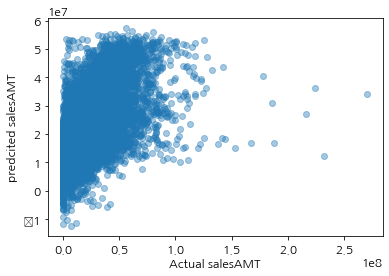

In [43]:
import matplotlib.pyplot as plt
plt.autoscale(enable=True)

plt.scatter(y_test,y_predict, alpha=0.4)
plt.xlabel('Actual salesAMT')
plt.ylabel('predcited salesAMT')
plt.show()

https://mindscale.kr/course/python-visualization-basic/grid

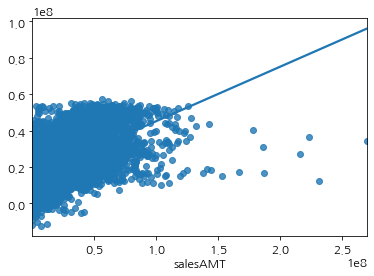

In [44]:
import seaborn as sns
sns.regplot(y_test,y_predict,ci=True)#신뢰구간

In [45]:
mlf.intercept_

array([7.50287834e+08])

In [46]:
mlf.coef_

array([[ 8.68328625e+05, -7.71500152e+03, -5.61364828e+00,
         4.20621543e+05,  7.53123672e+03,  4.29674515e+05,
         2.84531290e+05,  6.97731120e+05,  4.23754512e+06,
        -7.66359525e+06,  7.97064524e+06,  2.27564931e+07,
        -1.58961826e+06,  7.52445343e+06,  6.23656708e+06,
         1.82148557e+07, -1.96304606e+06,  5.26786774e+05,
        -9.97267262e+06,  1.47481219e+04]])

[groupby object를 dataframe으로](https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe)

# (메이저 시청률): 저녁 아침 시간에 따른 시청률 확인=> 데이터 사야함. 돈없어요

저녁, 아침 시간 어떤 시간에 시청률이 높고
1. NS 홈쇼핑이랑 다른 방송사 시청률 확인해서, 다른 방송사 시청률이 높아지면, NS 홈쇼핑 시청률이 높아지는가/ 떨어지는가 
2. NS 홈쇼핑


* 어떻게 2020년 6월이랑 연결 시킬 것인가
* 코로나: 코스피, 코스닥(경기,현금유동성에 민감: 작은 기업들), 금가격, 변동금리
* 홈쇼핑을 사용하는 사람들의 코스피, 코스닥 어느 것이 높을 것인가
* 홈쇼핑은 2주전에 편성이 끝남/ 시즌의 날씨 확인
* 트랜드 비교-> 특정요일만 뽑아 본다.


* 19년 6월과 20년 6월의 판매하는 상품군의 차이
* 음력 때문에 5,6,7& 주 seasonality
* 20년 6월에만 나타나고 자주하는 단어들

# tree regressor

dfcolumns=[]
for i in data:
    dfcolumns.append(i)
dfcolumns

# 상품명, timestamp제거
what2remove=['salesAMT','index','time','product_name','category','yy-mm-dd','s-hh-mm','f-hh-mm']
for i in what2remove:
    dfcolumns.remove(i)
print(dfcolumns)

dfcolumns.remove('category_농수축')


data[dfcolumns]

X=data[dfcolumns]
y=data['salesAMT']


from sklearn import tree
clf=tree.DecisionTreeRegressor()
clf=clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)

import numpy as np
import matplotlib.pyplot as plt

important=clf.feature_importances_
idx=np.arange(len(dfcolumns))
plt.barh(idx,important,align='center')
plt.yticks(idx,dfcolumns)
plt.xlabel('feature importance',size=15)
plt.ylabel('feature',size=15)
plt.show()

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape(y_test,y_pred)


# lightgbm

nonascii=dfcolumns
nonascii_dic={}
for i in range(len(nonascii)):
    nonascii_dic[dfcolumns[i]]=i
nonascii_dic
X.columns=X.columns.map(nonascii_dic)
y.columns=[0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100)

import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=0, n_estimators=1000)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
model_score = mape(y_test,predicted)
print(model_score)

import numpy as np
import matplotlib.pyplot as plt

important=clf.feature_importances_
idx=np.arange(len(dfcolumns))
plt.barh(idx,important,align='center')
plt.yticks(idx,dfcolumns)
plt.xlabel('feature importance',size=15)
plt.ylabel('feature',size=15)
plt.show()

# 그외
#https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/163684